# Descriptive Statistics

### required libraries for geopandas

In [1]:
# import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

Notation of Chapters equivalent to the Chapter numbers in Master Thesis

# 4. Data

# 4.1 Loading complete data

In [2]:
weather_df = pd.read_csv('weather_df.csv')

In [3]:
weather_df['latitude'].unique()

array([54.25, 53.5 , 52.  , 52.75, 43.  , 39.25, 55.  , 42.25, 41.5 ,
       40.75, 40.  , 38.5 , 37.75, 58.  , 57.25, 55.75, 37.  , 56.5 ,
       50.5 , 48.25, 51.25, 47.5 , 46.75, 49.  , 46.  , 45.25, 44.5 ,
       43.75, 49.75, 61.  , 61.75, 60.25, 59.5 , 58.75, 62.5 , 63.25,
       64.  , 64.75, 66.25, 65.5 , 67.  , 68.5 , 67.75, 69.25, 70.  ,
       70.75])

In [4]:
print(weather_df.columns)

Index(['Unnamed: 0', 'longitude', 'latitude', 'wind_2AM', 'dew_point_2AM',
       'temperature_2AM', 'uvb_2AM', 'lat_long', 'date',
       'apparent_temperature_2AM', 'wind_11AM', 'dew_point_11AM',
       'temperature_11AM', 'uvb_11AM', 'apparent_temperature_11AM', 'wind_4PM',
       'dew_point_4PM', 'temperature_4PM', 'uvb_4PM',
       'apparent_temperature_4PM', 'wind_11PM', 'dew_point_11PM',
       'temperature_11PM', 'uvb_11PM', 'apparent_temperature_11PM', 'country',
       'NUTS1', 'NUTS2', 'NUTS3', 'MRT_2AM', 'MRT_11AM', 'MRT_4PM', 'MRT_11PM',
       'Week_Number'],
      dtype='object')


In [5]:
# drop irrelevant variables
weather_df = weather_df.drop(['NUTS3', 'wind_2AM', 'dew_point_2AM', 'temperature_2AM', 'uvb_2AM', 'apparent_temperature_2AM',
                             'wind_11AM', 'dew_point_11AM', 'temperature_11AM', 'uvb_11AM', 'apparent_temperature_11AM',
                             'wind_4PM', 'dew_point_4PM', 'temperature_4PM', 'uvb_4PM','wind_11PM', 'dew_point_11PM',
                              'temperature_11PM', 'uvb_11PM', 'apparent_temperature_11PM', 'MRT_2AM', 'MRT_11AM', 'MRT_4PM',
                              'MRT_11PM'], 1)

## Checkpoint 1 to avoid data overload

In [2]:
#weather_df.to_csv('reduced_weather.csv')
# read reduced weather data
weather_df = pd.read_csv('reduced_weather.csv')

In [3]:
# delete first column
weather_df = weather_df.iloc[: , 1:]

In [4]:
# inspect data
weather_df.head()

,Unnamed: 0.1,longitude,latitude,lat_long,date,apparent_temperature_4PM,country,NUTS1,NUTS2,Week_Number
0,0,-10.0,54.25,"('54.25', '-10.0')",2000-05-01,12.55,IE,IE0,IE04,18
1,1,-10.0,54.25,"('54.25', '-10.0')",2000-05-02,9.44,IE,IE0,IE04,18
2,2,-10.0,54.25,"('54.25', '-10.0')",2000-05-03,9.50,IE,IE0,IE04,18
3,3,-10.0,54.25,"('54.25', '-10.0')",2000-05-04,10.72,IE,IE0,IE04,18
4,4,-10.0,54.25,"('54.25', '-10.0')",2000-05-05,11.48,IE,IE0,IE04,18


# 4.2 Merge with temperature threshold of reference period to find heat wave days

In [5]:
# load threshold data
thresholds = pd.read_csv('quantile_thresholds.csv', index_col=0)
thresholds.head(2)

,latitude,longitude,d2m,t2m,apparent_temperature
0,37.0,-6.25,20.096707,38.971600,39.232187
1,37.0,-5.50,19.063138,38.051736,38.677543


In [6]:
# rename to 99th percentile
thresholds = thresholds.rename(columns={"apparent_temperature": "99th_percentile"})

In [7]:
# merge with threshold data
final_df = weather_df.merge(thresholds,on=['longitude','latitude'], how='left').drop(columns = ['d2m','t2m'])

In [8]:
final_df.tail()

,Unnamed: 0.1,longitude,latitude,lat_long,date,apparent_temperature_4PM,country,NUTS1,NUTS2,Week_Number,99th_percentile
3891091,707467,29.75,61.75,"('61.75', '29.75')",2021-09-26,6.23,FI,FI1,FI1C,38,26.917881
3891092,707468,29.75,61.75,"('61.75', '29.75')",2021-09-27,6.89,FI,FI1,FI1C,39,26.917881
3891093,707469,29.75,61.75,"('61.75', '29.75')",2021-09-28,5.78,FI,FI1,FI1C,39,26.917881
3891094,707470,29.75,61.75,"('61.75', '29.75')",2021-09-29,6.11,FI,FI1,FI1C,39,26.917881
3891095,707471,29.75,61.75,"('61.75', '29.75')",2021-09-30,5.38,FI,FI1,FI1C,39,26.917881


In [9]:
# get day month and year
final_df['date'] = pd.to_datetime(final_df['date'])
final_df['day'] = final_df.date.dt.day
final_df['month'] = final_df.date.dt.month
final_df['year'] = final_df.date.dt.year

In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891096 entries, 0 to 3891095
Data columns (total 14 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Unnamed: 0.1              int64         
 1   longitude                 float64       
 2   latitude                  float64       
 3   lat_long                  object        
 4   date                      datetime64[ns]
 5   apparent_temperature_4PM  float64       
 6   country                   object        
 7   NUTS1                     object        
 8   NUTS2                     object        
 9   Week_Number               int64         
 10  99th_percentile           float64       
 11  day                       int64         
 12  month                     int64         
 13  year                      int64         
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 445.3+ MB


In [11]:
# get indication of weather threshold is exceeded
final_df['threshold_exceeded'] = np.where(final_df['apparent_temperature_4PM'] > final_df['99th_percentile'],1,0)

In [12]:
final_df.head(5)

,Unnamed: 0.1,longitude,latitude,lat_long,date,apparent_temperature_4PM,country,NUTS1,NUTS2,Week_Number,99th_percentile,day,month,year,threshold_exceeded
0,0,-10.0,54.25,"('54.25', '-10.0')",2000-05-01,12.55,IE,IE0,IE04,18,20.898722,1,5,2000,0
1,1,-10.0,54.25,"('54.25', '-10.0')",2000-05-02,9.44,IE,IE0,IE04,18,20.898722,2,5,2000,0
2,2,-10.0,54.25,"('54.25', '-10.0')",2000-05-03,9.50,IE,IE0,IE04,18,20.898722,3,5,2000,0
3,3,-10.0,54.25,"('54.25', '-10.0')",2000-05-04,10.72,IE,IE0,IE04,18,20.898722,4,5,2000,0
4,4,-10.0,54.25,"('54.25', '-10.0')",2000-05-05,11.48,IE,IE0,IE04,18,20.898722,5,5,2000,0


In [13]:
# show value count
final_df['threshold_exceeded'].value_counts()

0    3808602
1      82494
Name: threshold_exceeded, dtype: int64

In [14]:
# put date and coordinates as index
final_df = final_df.set_index(['lat_long', 'date'])

# 4.3 Using NUTS 2 regions for very large NUTS 1 regions

In [15]:
# inspecting size if NUTS 1 regions
final_df['NUTS1'].value_counts()

FI1    370260
NO0    356796
SE3    353430
ES4    144738
SE2     74052
        ...  
HU1      3366
NL4      3366
LU0      3366
ES3      3366
NL1      3366
Name: NUTS1, Length: 97, dtype: int64

#### Some NUTS 1 regions appear to be very big. For instance, the whole of Norway and mainland Finland form a NUTS 1 region. For the four largest NUTS 1 regions, NUTS 2 regions will be used to reduce the size of regions.

In [16]:
changed_regions = ['FI1', 'NO0', 'SE3', 'ES4']

final_df['NUTS1'] = np.where(final_df['NUTS1'].isin(changed_regions), final_df['NUTS2'], final_df['NUTS1'])
final_df['NUTS1'].value_counts()

FI1D    255816
SE33    191862
NO07    148104
SE32     84150
SE31     77418
         ...  
LU0       3366
NL1       3366
ES3       3366
NL4       3366
HU1       3366
Name: NUTS1, Length: 109, dtype: int64

#### After the change, Finnish, Norwegian and Swedish NUTS 2 region still remain big, but the improvement is considered sufficient.

In [17]:
final_df.head()

Unnamed: 0.1  longitude  latitude  \
lat_long           date                                            
('54.25', '-10.0') 2000-05-01             0      -10.0     54.25   
                   2000-05-02             1      -10.0     54.25   
                   2000-05-03             2      -10.0     54.25   
                   2000-05-04             3      -10.0     54.25   
                   2000-05-05             4      -10.0     54.25   

                               apparent_temperature_4PM country NUTS1 NUTS2  \
lat_long           date                                                       
('54.25', '-10.0') 2000-05-01                     12.55      IE   IE0  IE04   
                   2000-05-02                      9.44      IE   IE0  IE04   
                   2000-05-03                      9.50      IE   IE0  IE04   
                   2000-05-04                     10.72      IE   IE0  IE04   
                   2000-05-05                     11.48      IE   IE0  IE04   

                               Week_Number  99th_percentile  day  month  year  \
lat_long           date                                                         
('54.25', '-10.0') 2000-05-01           18        20.898722    1      5  2000   
                   2000-05-02           18        20.898722    2      5  2000   
                   2000-05-03           18        20.898722    3      5  2000   
                   2000-05-04           18        20.898722    4      5  2000   
                   2000-05-05           18        20.898722    5      5  2000   

                               threshold_exceeded  
lat_long           date                            
('54.25', '-10.0') 2000-05-01                   0  
                   2000-05-02                   0  
                   2000-05-03                   0  
                   2000-05-04                   0  
                   2000-05-05                   0

# 4.4 Count consecutive hot days

In [18]:
# define function to count number of consecutive days of threshold exceeded, 
# source: https://stackoverflow.com/questions/43616174/pandas-dataframe-how-to-count-the-number-of-1-rows-in-a-binary-column
def cumsum_bincount(a):  
    # Append 0 & look for a [0,1] pattern. Form a binned array based off 1s groups
    ids = a*(np.diff(np.r_[0,a])==1).cumsum()

    # Get the bincount, index into the count with ids and finally mask out 0s
    return a*np.bincount(ids)[ids]

In [19]:
# apply function
final_df['consecutive_HW_days'] = cumsum_bincount(final_df.threshold_exceeded.values)

In [20]:
# sort by longest heat wave recorded, it lasted 22 days
pd.set_option('display.max_columns', None)
final_df.sort_values(by=['consecutive_HW_days'], ascending=False).head()

Unnamed: 0.1  longitude  latitude  \
lat_long           date                                            
('60.25', '20.75') 2014-07-25        505597      20.75     60.25   
                   2014-08-03        505606      20.75     60.25   
                   2014-07-24        505596      20.75     60.25   
                   2014-08-10        505613      20.75     60.25   
                   2014-08-09        505612      20.75     60.25   

                               apparent_temperature_4PM country NUTS1 NUTS2  \
lat_long           date                                                       
('60.25', '20.75') 2014-07-25                     24.67      FI   FI2  FI20   
                   2014-08-03                     26.33      FI   FI2  FI20   
                   2014-07-24                     24.07      FI   FI2  FI20   
                   2014-08-10                     21.66      FI   FI2  FI20   
                   2014-08-09                     22.69      FI   FI2  FI20   

                               Week_Number  99th_percentile  day  month  year  \
lat_long           date                                                         
('60.25', '20.75') 2014-07-25           30         21.44443   25      7  2014   
                   2014-08-03           31         21.44443    3      8  2014   
                   2014-07-24           30         21.44443   24      7  2014   
                   2014-08-10           32         21.44443   10      8  2014   
                   2014-08-09           32         21.44443    9      8  2014   

                               threshold_exceeded  consecutive_HW_days  
lat_long           date                                                 
('60.25', '20.75') 2014-07-25                   1                   22  
                   2014-08-03                   1                   22  
                   2014-07-24                   1                   22  
                   2014-08-10                   1                   22  
                   2014-08-09                   1                   22

In [21]:
# reset index
final_df = final_df.reset_index(level=['lat_long', 'date'])
final_df.head(2)

,lat_long,date,Unnamed: 0.1,longitude,latitude,apparent_temperature_4PM,country,NUTS1,NUTS2,Week_Number,99th_percentile,day,month,year,threshold_exceeded,consecutive_HW_days
0,"('54.25', '-10.0')",2000-05-01,0,-10.0,54.25,12.55,IE,IE0,IE04,18,20.898722,1,5,2000,0,0
1,"('54.25', '-10.0')",2000-05-02,1,-10.0,54.25,9.44,IE,IE0,IE04,18,20.898722,2,5,2000,0,0


In [22]:
# show value counts, each number in the right column should be divided by the value in the left column to obtain the unque count
# of heat wave lengths, e.g. 22/22 = 1 --> 1 heat wave with length 22 days
final_df['consecutive_HW_days'].value_counts()

0     3808602
1       25863
2       20830
3       12780
4        8784
5        5805
6        3318
7        1582
11       1023
8         880
9         540
10        390
12        360
13         91
16         64
20         60
17         34
22         22
21         21
18         18
15         15
14         14
Name: consecutive_HW_days, dtype: int64

In [23]:
# indicate whether day is a heat wave day
final_df['heat_wave_day'] = np.where((final_df['threshold_exceeded'] == 1) & (final_df['consecutive_HW_days'] >= 4),1,0)

In [24]:
# show frequency of heat wave days
final_df['heat_wave_day'].value_counts()

0    3868075
1      23021
Name: heat_wave_day, dtype: int64

In [25]:
# group number of heat wave days by year
final_df.groupby('year')['heat_wave_day'].value_counts()

year  heat_wave_day
2000  0                176554
      1                   314
2001  0                176797
      1                    71
2002  0                176550
      1                   318
2003  0                173429
      1                  3439
2004  0                176710
      1                   158
2005  0                176598
      1                   270
2006  0                176405
      1                   463
2007  0                175732
      1                  1136
2008  0                176511
      1                   357
2009  0                176864
      1                     4
2010  0                175391
      1                  1477
2011  0                176487
      1                   381
2012  0                176030
      1                   838
2013  0                176182
      1                   686
2014  0                175345
      1                  1523
2015  0                174848
      1                  2020
2016  0             

# 4.5 Load and describe mortality data

In [30]:
# read mortality data
mortality = pd.read_csv('Mortality.csv', index_col=0)
mortality.head()

,TIME,GEO,GEO_LABEL,deaths,country,week_nr,year,population,density,population_65+,share_over_65,death_p_100k
17,2000W18,BE1,Région de Bruxelles-Capitale/Brussels Hoofdste...,196.0,BE,W18,2000,959318.0,5974.3,160908.0,16.773166,20.431181
18,2000W19,BE1,Région de Bruxelles-Capitale/Brussels Hoofdste...,172.0,BE,W19,2000,959318.0,5974.3,160908.0,16.773166,17.929404
19,2000W20,BE1,Région de Bruxelles-Capitale/Brussels Hoofdste...,158.0,BE,W20,2000,959318.0,5974.3,160908.0,16.773166,16.470034
20,2000W21,BE1,Région de Bruxelles-Capitale/Brussels Hoofdste...,193.0,BE,W21,2000,959318.0,5974.3,160908.0,16.773166,20.118459
21,2000W22,BE1,Région de Bruxelles-Capitale/Brussels Hoofdste...,170.0,BE,W22,2000,959318.0,5974.3,160908.0,16.773166,17.720923


In [31]:
# describe deaths per 100,000
mortality['death_p_100k'].describe()

count    48029.000000
mean        18.470753
std          4.021622
min          0.000000
25%         16.068035
50%         18.131253
75%         20.653369
max         53.439914
Name: death_p_100k, dtype: float64

In [32]:
# inspect shape
mortality.shape

(59202, 12)

In [33]:
# drop unnecessary column and rename others
mortality = mortality.drop('week_nr', 1)
mortality = mortality.rename(columns={'TIME': 'week_nr', 'GEO': 'NUTS1'})
mortality.head()

,week_nr,NUTS1,GEO_LABEL,deaths,country,year,population,density,population_65+,share_over_65,death_p_100k
17,2000W18,BE1,Région de Bruxelles-Capitale/Brussels Hoofdste...,196.0,BE,2000,959318.0,5974.3,160908.0,16.773166,20.431181
18,2000W19,BE1,Région de Bruxelles-Capitale/Brussels Hoofdste...,172.0,BE,2000,959318.0,5974.3,160908.0,16.773166,17.929404
19,2000W20,BE1,Région de Bruxelles-Capitale/Brussels Hoofdste...,158.0,BE,2000,959318.0,5974.3,160908.0,16.773166,16.470034
20,2000W21,BE1,Région de Bruxelles-Capitale/Brussels Hoofdste...,193.0,BE,2000,959318.0,5974.3,160908.0,16.773166,20.118459
21,2000W22,BE1,Région de Bruxelles-Capitale/Brussels Hoofdste...,170.0,BE,2000,959318.0,5974.3,160908.0,16.773166,17.720923


### Get the average mortality by NUTS1 region and plot it

In [34]:
avg_mortality = mortality.groupby('NUTS1')['death_p_100k'].mean()
avg_mortality = pd.DataFrame(avg_mortality)
#HW_days = HW_days.rename(columns={"heat_wave_day": "days"})
avg_mortality.head(2)

,death_p_100k
NUTS1,
AL0,12.158167
AT1,17.801342


In [35]:
# loading shx file available: https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts
regions = gpd.read_file('NUTS_RG_20M_2021_3035.shx')
# There is a problem with NUTS 2 regions from Norway as the NUTS codes have recently changed
regions[(regions['CNTR_CODE'] == 'NO') & (regions['LEVL_CODE'] == 2)]

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
1940,NO02,2,NO,Innlandet,Innlandet,0.0,NaN,0,NO02,"POLYGON ((4226322.205 4220417.267, 4217247.246..."
1941,NO06,2,NO,TrÃ¸ndelag,TrÃ¸ndelag,0.0,NaN,0,NO06,"MULTIPOLYGON (((4525407.639 4674222.130, 44993..."
1942,NO08,2,NO,Oslo og Viken,Oslo og Viken,0.0,0.0,0,NO08,"POLYGON ((4226322.205 4220417.267, 4276802.361..."
1943,NO09,2,NO,Agder og SÃ¸r-Ãstlandet,Agder og SÃ¸r-Ãstlandet,0.0,0.0,0,NO09,"POLYGON ((4339135.109 4065666.746, 4342546.778..."
1944,NO0A,2,NO,Vestlandet,Vestlandet,0.0,0.0,0,NO0A,"MULTIPOLYGON (((4258515.326 4480648.690, 42645..."
1961,NO07,2,NO,Nord-Norge,Nord-Norge,0.0,NaN,0,NO07,"MULTIPOLYGON (((5073773.420 5207018.495, 50670..."
2008,NO0B,2,NO,Jan Mayen and Svalbard,Jan Mayen and Svalbard,NaN,NaN,0,NO0B,"MULTIPOLYGON (((4754167.335 6382461.408, 47465..."


In [36]:
# imputing changed Norwegian NUTS codes
# Oslo og Akershus
regions['NUTS_ID'] = np.where(regions['NUTS_ID'] == 'NO08', 'NO01', regions['NUTS_ID'])
# Agder og Rogaland
regions['NUTS_ID'] = np.where(regions['NUTS_ID'] == 'NO09', 'NO04', regions['NUTS_ID'])
# Vestlandet
regions['NUTS_ID'] = np.where(regions['NUTS_ID'] == 'NO0A', 'NO05', regions['NUTS_ID'])

In [37]:
# join with geodataframe
avg_mortality1 = regions.set_index('NUTS_ID').join(avg_mortality)
avg_mortality1.head()
#HW_days_country = HW_days_country.drop(['total_days', 'heat_wave_days'], 1)

,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,death_p_100k
NUTS_ID,,,,,,,,,,
FR,0,FR,France,France,0.0,NaN,0,FR,"MULTIPOLYGON (((9954236.116 -3059379.316, 9961...",NaN
HR,0,HR,Hrvatska,Hrvatska,0.0,NaN,0,HR,"MULTIPOLYGON (((4827385.889 2618351.326, 48483...",NaN
HU,0,HU,MagyarorszÃ¡g,MagyarorszÃ¡g,0.0,NaN,0,HU,"POLYGON ((5214660.069 2880853.832, 5216710.220...",NaN
AL,0,AL,ShqipÃ«ria,ShqipÃ«ria,0.0,NaN,0,AL,"POLYGON ((5129579.170 2204098.752, 5148385.473...",NaN
AT,0,AT,Ãsterreich,Ãsterreich,0.0,NaN,0,AT,"POLYGON ((4742889.368 2876362.725, 4783217.798...",NaN


In [38]:
# drop Canary Islands, Svalbard (Norway) and Iceland for better visualization
avg_mortality1 = avg_mortality1.drop(['ES7', 'NO0B2', 'NO0B', 'NO0B1', 'IS0', 'NO', 'NO0'])

In [39]:
# convert to geodataframe
avg_mortality1 = gpd.GeoDataFrame(avg_mortality1)
avg_mortality1.crs = "epsg:3035"
avg_mortality1 = avg_mortality1.to_crs('epsg:3035')
avg_mortality1.head(1)

,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,death_p_100k
NUTS_ID,,,,,,,,,,
FR,0,FR,France,France,0.0,NaN,0,FR,"MULTIPOLYGON (((9954236.116 -3059379.316, 9961...",NaN


In [41]:
# define map plot
def map_plot(data, variable, colors, text1, text2, text3): 
    # create figure
    fig, ax = plt.subplots(1, figsize = (12, 8), dpi = 100)

    # add title and subtitle
    fig = plt.figtext(0.3, 0.98, text1, fontsize = 18, ha = 'left', fontweight = 3)
    fig = plt.figtext(0.3, 0.935, text2, fontsize = 14, ha = 'left')

    # add source text
    fig = plt.figtext(0.3, 0.1, text3, fontsize = 8, ha = 'left',  va = 'bottom', color = 'lightgrey')

    # remove axis
    fig = ax.set_axis_off()

    # plot map with legend
    fig = data.plot(column = variable, cmap = colors, linewidth = 0.8, ax = ax, edgecolor = '0.8', legend = True)
    return fig 

<AxesSubplot:>

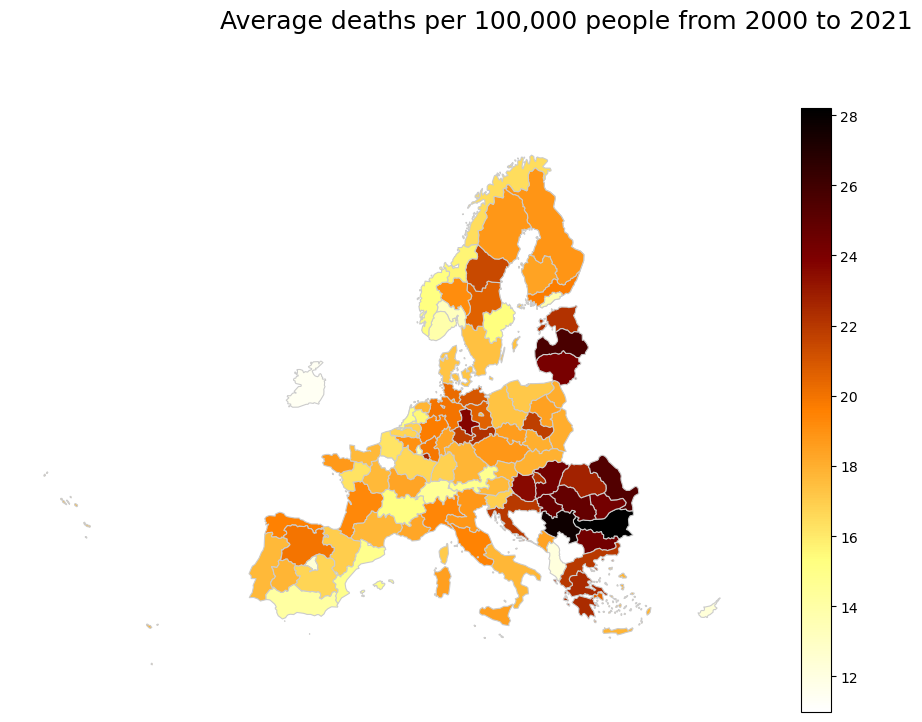

In [42]:
# plot the average deaths per 100,000 across NUTS 1 regions
map_plot(avg_mortality1, 'death_p_100k', 'afmhot_r', 
         'Average deaths per 100,000 people from 2000 to 2021', 
         '',
        '')

# 4.6 Merge large dataset with mortality data

In [43]:
# change and create new variables that match the variables in the mortality data for merging
final_df['year'] = final_df['year'].astype(str)
final_df['Week_Number'] = final_df['Week_Number'].astype(str)
final_df['Week_Number'] = 'W' + final_df['Week_Number']
final_df["week_nr"] = final_df['year'] + final_df['Week_Number']
final_df.head()

,lat_long,date,Unnamed: 0.1,longitude,latitude,apparent_temperature_4PM,country,NUTS1,NUTS2,Week_Number,99th_percentile,day,month,year,threshold_exceeded,consecutive_HW_days,heat_wave_day,health_expend_p_capita,Asthma,Chronic_depression,Chronic_lower_respiratory_diseases,Coronary_heart_disease_or_angina_pectoris,Diabetes,Heart_attack_or_chronic_consequences_of_heart_attack,High_blood_pressure,Kidney_problems,Obesity,Stroke_or_chronic_consequences_of_stroke,week_nr
0,"('54.25', '-10.0')",2000-05-01,0,-10.0,54.25,12.55,IE,IE0,IE04,W18,20.898722,1,5,2000,0,0,0,3760.622022,8.15,8.0,2.5,2.4,4.05,1.2,13.55,2.8,22.05,0.7,2000W18
1,"('54.25', '-10.0')",2000-05-02,1,-10.0,54.25,9.44,IE,IE0,IE04,W18,20.898722,2,5,2000,0,0,0,3760.622022,8.15,8.0,2.5,2.4,4.05,1.2,13.55,2.8,22.05,0.7,2000W18
2,"('54.25', '-10.0')",2000-05-03,2,-10.0,54.25,9.50,IE,IE0,IE04,W18,20.898722,3,5,2000,0,0,0,3760.622022,8.15,8.0,2.5,2.4,4.05,1.2,13.55,2.8,22.05,0.7,2000W18
3,"('54.25', '-10.0')",2000-05-04,3,-10.0,54.25,10.72,IE,IE0,IE04,W18,20.898722,4,5,2000,0,0,0,3760.622022,8.15,8.0,2.5,2.4,4.05,1.2,13.55,2.8,22.05,0.7,2000W18
4,"('54.25', '-10.0')",2000-05-05,4,-10.0,54.25,11.48,IE,IE0,IE04,W18,20.898722,5,5,2000,0,0,0,3760.622022,8.15,8.0,2.5,2.4,4.05,1.2,13.55,2.8,22.05,0.7,2000W18


In [44]:
final_df.shape

(3891096, 29)

### Since maortality data for the Netherlands is only available on the national level for a long time period, NUTS 1 regions will not be included for the Netherlands and only national data is used.

In [45]:
final_df['NUTS1'] = np.where(final_df['NUTS1'].str.contains('NL'), 'NL', final_df['NUTS1'])

In [46]:
# merge weather data with mortality
final_df = final_df.merge(mortality, how='left', on=['NUTS1','week_nr']).drop(['country_y', 'year_y'], axis = 1)
final_df = final_df.rename(columns={'GEO_LABEL': 'NUTS1_Label', 'country_x': 'country', 'year_x': 'year'})
final_df.shape

(3891096, 36)

In [47]:
# inspect data
pd.set_option('display.max_columns', None)
final_df.head(2)

,lat_long,date,Unnamed: 0.1,longitude,latitude,apparent_temperature_4PM,country,NUTS1,NUTS2,Week_Number,99th_percentile,day,month,year,threshold_exceeded,consecutive_HW_days,heat_wave_day,health_expend_p_capita,Asthma,Chronic_depression,Chronic_lower_respiratory_diseases,Coronary_heart_disease_or_angina_pectoris,Diabetes,Heart_attack_or_chronic_consequences_of_heart_attack,High_blood_pressure,Kidney_problems,Obesity,Stroke_or_chronic_consequences_of_stroke,week_nr,NUTS1_Label,deaths,population,density,population_65+,share_over_65,death_p_100k
0,"('54.25', '-10.0')",2000-05-01,0,-10.0,54.25,12.55,IE,IE0,IE04,W18,20.898722,1,5,2000,0,0,0,3760.622022,8.15,8.0,2.5,2.4,4.05,1.2,13.55,2.8,22.05,0.7,2000W18,Éire/Ireland,NaN,3777565.0,55.6,423994.0,11.224003,NaN
1,"('54.25', '-10.0')",2000-05-02,1,-10.0,54.25,9.44,IE,IE0,IE04,W18,20.898722,2,5,2000,0,0,0,3760.622022,8.15,8.0,2.5,2.4,4.05,1.2,13.55,2.8,22.05,0.7,2000W18,Éire/Ireland,NaN,3777565.0,55.6,423994.0,11.224003,NaN


# 4.7 Obtining dataset of all recorded heat waves from 2000 to 2021 irrespective of if mortality data is available

In this section, all heatwaves that are recorded from 2000 to 2021 are recorded to plot the development of the frequency of heat waves as well as their average duration.

In [48]:
# get the number of consecutive heat waves for the previous row
final_df['consecutive_HW_days_prev'] = final_df['consecutive_HW_days'].shift()
final_df.head(5)

,lat_long,date,Unnamed: 0.1,longitude,latitude,apparent_temperature_4PM,country,NUTS1,NUTS2,Week_Number,99th_percentile,day,month,year,threshold_exceeded,consecutive_HW_days,heat_wave_day,health_expend_p_capita,Asthma,Chronic_depression,Chronic_lower_respiratory_diseases,Coronary_heart_disease_or_angina_pectoris,Diabetes,Heart_attack_or_chronic_consequences_of_heart_attack,High_blood_pressure,Kidney_problems,Obesity,Stroke_or_chronic_consequences_of_stroke,week_nr,NUTS1_Label,deaths,population,density,population_65+,share_over_65,death_p_100k,consecutive_HW_days_prev
0,"('54.25', '-10.0')",2000-05-01,0,-10.0,54.25,12.55,IE,IE0,IE04,W18,20.898722,1,5,2000,0,0,0,3760.622022,8.15,8.0,2.5,2.4,4.05,1.2,13.55,2.8,22.05,0.7,2000W18,Éire/Ireland,NaN,3777565.0,55.6,423994.0,11.224003,NaN,NaN
1,"('54.25', '-10.0')",2000-05-02,1,-10.0,54.25,9.44,IE,IE0,IE04,W18,20.898722,2,5,2000,0,0,0,3760.622022,8.15,8.0,2.5,2.4,4.05,1.2,13.55,2.8,22.05,0.7,2000W18,Éire/Ireland,NaN,3777565.0,55.6,423994.0,11.224003,NaN,0.0
2,"('54.25', '-10.0')",2000-05-03,2,-10.0,54.25,9.50,IE,IE0,IE04,W18,20.898722,3,5,2000,0,0,0,3760.622022,8.15,8.0,2.5,2.4,4.05,1.2,13.55,2.8,22.05,0.7,2000W18,Éire/Ireland,NaN,3777565.0,55.6,423994.0,11.224003,NaN,0.0
3,"('54.25', '-10.0')",2000-05-04,3,-10.0,54.25,10.72,IE,IE0,IE04,W18,20.898722,4,5,2000,0,0,0,3760.622022,8.15,8.0,2.5,2.4,4.05,1.2,13.55,2.8,22.05,0.7,2000W18,Éire/Ireland,NaN,3777565.0,55.6,423994.0,11.224003,NaN,0.0
4,"('54.25', '-10.0')",2000-05-05,4,-10.0,54.25,11.48,IE,IE0,IE04,W18,20.898722,5,5,2000,0,0,0,3760.622022,8.15,8.0,2.5,2.4,4.05,1.2,13.55,2.8,22.05,0.7,2000W18,Éire/Ireland,NaN,3777565.0,55.6,423994.0,11.224003,NaN,0.0


The data are sorted by latitude, longitude and time which is essential for the next step.

In [49]:
# get a unique number for periods with the same number of consecutive heat wave days
# that way, all days with a constant value in the column 'consecutive_HW_days'
# (and at the same time all heat waves (consecutive_HW_days > 3)) will receive a unique identifier which 
# is stored in the column 'cumsum'
final_df['cumsum'] = (final_df['consecutive_HW_days'] != final_df['consecutive_HW_days_prev']).cumsum()
final_df

,lat_long,date,Unnamed: 0.1,longitude,latitude,apparent_temperature_4PM,country,NUTS1,NUTS2,Week_Number,99th_percentile,day,month,year,threshold_exceeded,consecutive_HW_days,heat_wave_day,health_expend_p_capita,Asthma,Chronic_depression,Chronic_lower_respiratory_diseases,Coronary_heart_disease_or_angina_pectoris,Diabetes,Heart_attack_or_chronic_consequences_of_heart_attack,High_blood_pressure,Kidney_problems,Obesity,Stroke_or_chronic_consequences_of_stroke,week_nr,NUTS1_Label,deaths,population,density,population_65+,share_over_65,death_p_100k,consecutive_HW_days_prev,cumsum
0,"('54.25', '-10.0')",2000-05-01,0,-10.00,54.25,12.55,IE,IE0,IE04,W18,20.898722,1,5,2000,0,0,0,3760.622022,8.15,8.00,2.50,2.40,4.05,1.2,13.55,2.8,22.05,0.7,2000W18,Éire/Ireland,NaN,3777565.0,55.6,423994.0,11.224003,NaN,NaN,1
1,"('54.25', '-10.0')",2000-05-02,1,-10.00,54.25,9.44,IE,IE0,IE04,W18,20.898722,2,5,2000,0,0,0,3760.622022,8.15,8.00,2.50,2.40,4.05,1.2,13.55,2.8,22.05,0.7,2000W18,Éire/Ireland,NaN,3777565.0,55.6,423994.0,11.224003,NaN,0.0,1
2,"('54.25', '-10.0')",2000-05-03,2,-10.00,54.25,9.50,IE,IE0,IE04,W18,20.898722,3,5,2000,0,0,0,3760.622022,8.15,8.00,2.50,2.40,4.05,1.2,13.55,2.8,22.05,0.7,2000W18,Éire/Ireland,NaN,3777565.0,55.6,423994.0,11.224003,NaN,0.0,1
3,"('54.25', '-10.0')",2000-05-04,3,-10.00,54.25,10.72,IE,IE0,IE04,W18,20.898722,4,5,2000,0,0,0,3760.622022,8.15,8.00,2.50,2.40,4.05,1.2,13.55,2.8,22.05,0.7,2000W18,Éire/Ireland,NaN,3777565.0,55.6,423994.0,11.224003,NaN,0.0,1
4,"('54.25', '-10.0')",2000-05-05,4,-10.00,54.25,11.48,IE,IE0,IE04,W18,20.898722,5,5,2000,0,0,0,3760.622022,8.15,8.00,2.50,2.40,4.05,1.2,13.55,2.8,22.05,0.7,2000W18,Éire/Ireland,NaN,3777565.0,55.6,423994.0,11.224003,NaN,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891091,"('61.75', '29.75')",2021-09-26,707467,29.75,61.75,6.23,FI,FI1C,FI1C,W38,26.917881,26,9,2021,0,0,0,4075.989728,9.30,9.65,3.15,4.95,8.60,1.7,26.10,1.5,19.35,1.6,2021W38,Etelä-Suomi,287.0,1148794.0,36.6,291137.0,25.342838,24.982721,0.0,90055
3891092,"('61.75', '29.75')",2021-09-27,707468,29.75,61.75,6.89,FI,FI1C,FI1C,W39,26.917881,27,9,2021,0,0,0,4075.989728,9.30,9.65,3.15,4.95,8.60,1.7,26.10,1.5,19.35,1.6,2021W39,Etelä-Suomi,265.0,1148794.0,36.6,291137.0,25.342838,23.067669,0.0,90055
3891093,"('61.75', '29.75')",2021-09-28,707469,29.75,61.75,5.78,FI,FI1C,FI1C,W39,26.917881,28,9,2021,0,0,0,4075.989728,9.30,9.65,3.15,4.95,8.60,1.7,26.10,1.5,19.35,1.6,2021W39,Etelä-Suomi,265.0,1148794.0,36.6,291137.0,25.342838,23.067669,0.0,90055
3891094,"('61.75', '29.75')",2021-09-29,707470,29.75,61.75,6.11,FI,FI1C,FI1C,W39,26.917881,29,9,2021,0,0,0,4075.989728,9.30,9.65,3.15,4.95,8.60,1.7,26.10,1.5,19.35,1.6,2021W39,Etelä-Suomi,265.0,1148794.0,36.6,291137.0,25.342838,23.067669,0.0,90055


In [50]:
# 'cumsum' is equal to 1 until the first hot day (the first day with exceeded threshold) which will have 'cumsum' == 2
# it's only a single hot day and not a heat wave
final_df[final_df['cumsum'] == 2]

,lat_long,date,Unnamed: 0.1,longitude,latitude,apparent_temperature_4PM,country,NUTS1,NUTS2,Week_Number,99th_percentile,day,month,year,threshold_exceeded,consecutive_HW_days,heat_wave_day,health_expend_p_capita,Asthma,Chronic_depression,Chronic_lower_respiratory_diseases,Coronary_heart_disease_or_angina_pectoris,Diabetes,Heart_attack_or_chronic_consequences_of_heart_attack,High_blood_pressure,Kidney_problems,Obesity,Stroke_or_chronic_consequences_of_stroke,week_nr,NUTS1_Label,deaths,population,density,population_65+,share_over_65,death_p_100k,consecutive_HW_days_prev,cumsum
388,"('53.5', '-10.0')",2000-07-22,388,-10.0,53.5,24.47,IE,IE0,IE04,W29,23.318686,22,7,2000,1,1,0,3760.622022,8.15,8.0,2.5,2.4,4.05,1.2,13.55,2.8,22.05,0.7,2000W29,Éire/Ireland,NaN,3777565.0,55.6,423994.0,11.224003,NaN,0.0,2


In [51]:
# by running the following command heat waves can be found
final_df[final_df['consecutive_HW_days_prev'] > 3]
# the first heat wave is found for 'cumsum' == 886, 886 will be the unique identifier for this heatwave
final_df[final_df['cumsum'] == 886]

,lat_long,date,Unnamed: 0.1,longitude,latitude,apparent_temperature_4PM,country,NUTS1,NUTS2,Week_Number,99th_percentile,day,month,year,threshold_exceeded,consecutive_HW_days,heat_wave_day,health_expend_p_capita,Asthma,Chronic_depression,Chronic_lower_respiratory_diseases,Coronary_heart_disease_or_angina_pectoris,Diabetes,Heart_attack_or_chronic_consequences_of_heart_attack,High_blood_pressure,Kidney_problems,Obesity,Stroke_or_chronic_consequences_of_stroke,week_nr,NUTS1_Label,deaths,population,density,population_65+,share_over_65,death_p_100k,consecutive_HW_days_prev,cumsum
74600,"('41.5', '2.0')",2001-07-29,74600,2.0,41.5,33.48,ES,ES5,ES51,W30,33.150214,29,7,2001,1,4,1,1249.730299,4.3,6.75,3.0,0.75,7.15,0.85,19.0,2.6,16.1,0.9,2001W30,Este (ES),1837.0,11280460.0,188.0,1874249.0,16.615005,16.284797,0.0,886
74601,"('41.5', '2.0')",2001-07-30,74601,2.0,41.5,34.25,ES,ES5,ES51,W31,33.150214,30,7,2001,1,4,1,1249.730299,4.3,6.75,3.0,0.75,7.15,0.85,19.0,2.6,16.1,0.9,2001W31,Este (ES),2247.0,11280460.0,188.0,1874249.0,16.615005,19.919400,4.0,886
74602,"('41.5', '2.0')",2001-07-31,74602,2.0,41.5,35.09,ES,ES5,ES51,W31,33.150214,31,7,2001,1,4,1,1249.730299,4.3,6.75,3.0,0.75,7.15,0.85,19.0,2.6,16.1,0.9,2001W31,Este (ES),2247.0,11280460.0,188.0,1874249.0,16.615005,19.919400,4.0,886
74603,"('41.5', '2.0')",2001-08-01,74603,2.0,41.5,34.54,ES,ES5,ES51,W31,33.150214,1,8,2001,1,4,1,1249.730299,4.3,6.75,3.0,0.75,7.15,0.85,19.0,2.6,16.1,0.9,2001W31,Este (ES),2247.0,11280460.0,188.0,1874249.0,16.615005,19.919400,4.0,886


In [52]:
# filtering only heatwave days
heatwave = final_df[final_df['consecutive_HW_days'] > 3]
# rename cumsum to heatwave_id
heatwave = heatwave.rename(columns={'cumsum': 'heatwave_id'})
# transform to string
heatwave['heatwave_id'] = heatwave['heatwave_id'].astype(str)
heatwave.head()

,lat_long,date,Unnamed: 0.1,longitude,latitude,apparent_temperature_4PM,country,NUTS1,NUTS2,Week_Number,99th_percentile,day,month,year,threshold_exceeded,consecutive_HW_days,heat_wave_day,health_expend_p_capita,Asthma,Chronic_depression,Chronic_lower_respiratory_diseases,Coronary_heart_disease_or_angina_pectoris,Diabetes,Heart_attack_or_chronic_consequences_of_heart_attack,High_blood_pressure,Kidney_problems,Obesity,Stroke_or_chronic_consequences_of_stroke,week_nr,NUTS1_Label,deaths,population,density,population_65+,share_over_65,death_p_100k,consecutive_HW_days_prev,heatwave_id
74600,"('41.5', '2.0')",2001-07-29,74600,2.00,41.50,33.48,ES,ES5,ES51,W30,33.150214,29,7,2001,1,4,1,1249.730299,4.3,6.75,3.00,0.75,7.15,0.85,19.00,2.60,16.10,0.9,2001W30,Este (ES),1837.0,11280460.0,188.0,1874249.0,16.615005,16.284797,0.0,886
74601,"('41.5', '2.0')",2001-07-30,74601,2.00,41.50,34.25,ES,ES5,ES51,W31,33.150214,30,7,2001,1,4,1,1249.730299,4.3,6.75,3.00,0.75,7.15,0.85,19.00,2.60,16.10,0.9,2001W31,Este (ES),2247.0,11280460.0,188.0,1874249.0,16.615005,19.919400,4.0,886
74602,"('41.5', '2.0')",2001-07-31,74602,2.00,41.50,35.09,ES,ES5,ES51,W31,33.150214,31,7,2001,1,4,1,1249.730299,4.3,6.75,3.00,0.75,7.15,0.85,19.00,2.60,16.10,0.9,2001W31,Este (ES),2247.0,11280460.0,188.0,1874249.0,16.615005,19.919400,4.0,886
74603,"('41.5', '2.0')",2001-08-01,74603,2.00,41.50,34.54,ES,ES5,ES51,W31,33.150214,1,8,2001,1,4,1,1249.730299,4.3,6.75,3.00,0.75,7.15,0.85,19.00,2.60,16.10,0.9,2001W31,Este (ES),2247.0,11280460.0,188.0,1874249.0,16.615005,19.919400,4.0,886
85310,"('43.75', '4.25')",2001-07-29,85310,4.25,43.75,36.00,FR,FRJ,FRJ1,W30,35.635479,29,7,2001,1,4,1,2619.629293,8.3,6.80,5.95,2.05,8.65,1.20,15.45,2.75,14.85,1.1,2001W30,Occitanie,NaN,4962851.0,68.7,953666.0,19.216092,NaN,0.0,1058


In [53]:
print(heatwave.columns)

Index(['lat_long', 'date', 'Unnamed: 0.1', 'longitude', 'latitude',
       'apparent_temperature_4PM', 'country', 'NUTS1', 'NUTS2', 'Week_Number',
       '99th_percentile', 'day', 'month', 'year', 'threshold_exceeded',
       'consecutive_HW_days', 'heat_wave_day', 'health_expend_p_capita',
       'Asthma', 'Chronic_depression', 'Chronic_lower_respiratory_diseases',
       'Coronary_heart_disease_or_angina_pectoris', 'Diabetes',
       'Heart_attack_or_chronic_consequences_of_heart_attack',
       'High_blood_pressure', 'Kidney_problems', 'Obesity',
       'Stroke_or_chronic_consequences_of_stroke', 'week_nr', 'NUTS1_Label',
       'deaths', 'population', 'density', 'population_65+', 'share_over_65',
       'death_p_100k', 'consecutive_HW_days_prev', 'heatwave_id'],
      dtype='object')


In [54]:
# aggregate heatwave days to have each heatwave as an instance
heatwave = heatwave.groupby('heatwave_id').agg({'heatwave_id': 'first',
                                         'country': 'first',
                                         'NUTS1': 'first',
                                         'lat_long': 'first',
                                         'date': ['min', 'max'],
                                         'latitude': 'mean',
                                         'longitude': 'mean',
                                         'NUTS2': 'first',
                                         'Week_Number': 'first',
                                         '99th_percentile': 'mean',
                                         'month': 'mean',
                                         'year': 'first',
                                         'threshold_exceeded': 'sum',
                                         'consecutive_HW_days': 'max',
                                         'heat_wave_day': 'sum',
                                         'health_expend_p_capita': 'mean',
                                         'Asthma': 'mean',
                                         'Chronic_depression': 'mean',
                                         'Chronic_lower_respiratory_diseases': 'mean',
                                         'Coronary_heart_disease_or_angina_pectoris': 'mean',
                                         'Diabetes': 'mean',
                                         'Heart_attack_or_chronic_consequences_of_heart_attack': 'mean',
                                         'High_blood_pressure': 'mean',
                                         'Kidney_problems': 'mean',
                                         'Stroke_or_chronic_consequences_of_stroke': 'mean',
                                         'week_nr': 'first',
                                         'deaths': 'mean',
                                         'population': 'mean',
                                         'share_over_65': 'mean',
                                         'death_p_100k': 'mean'})
heatwave.head(7)

heatwave_id country NUTS1           lat_long       date  \
                  first   first first              first        min   
heatwave_id                                                           
10024             10024      BE   BE3   ('50.5', '5.75') 2003-08-03   
10036             10036      BE   BE3  ('49.75', '5.75') 2003-08-02   
10046             10046      FR   FRF   ('49.0', '5.75') 2003-08-02   
10064             10064      FR   FRF  ('48.25', '5.75') 2003-08-02   
10084             10084      FR   FRC   ('47.5', '5.75') 2003-08-02   
10104             10104      FR   FRC  ('46.75', '5.75') 2003-08-02   
10122             10122      FR   FRK   ('46.0', '5.75') 2003-08-03   

                       latitude longitude NUTS2 Week_Number 99th_percentile  \
                   max     mean      mean first       first            mean   
heatwave_id                                                                   
10024       2003-08-12    50.50      5.75  BE33         W31       29.609960   
10036       2003-08-13    49.75      5.75  BE34         W31       29.406890   
10046       2003-08-13    49.00      5.75  FRF3         W31       31.552300   
10064       2003-08-13    48.25      5.75  FRF3         W31       31.399587   
10084       2003-08-13    47.50      5.75  FRC2         W31       33.250386   
10104       2003-08-13    46.75      5.75  FRC2         W31       31.149866   
10122       2003-08-13    46.00      5.75  FRK2         W31       31.198698   

            month  year threshold_exceeded consecutive_HW_days heat_wave_day  \
             mean first                sum                 max           sum   
heatwave_id                                                                    
10024         8.0  2003                 10                  10            10   
10036         8.0  2003                 12                  12            12   
10046         8.0  2003                 12                  12            12   
10064         8.0  2003                 12                  12            12   
10084         8.0  2003                 12                  12            12   
10104         8.0  2003                 12                  12            12   
10122         8.0  2003                 11                  11            11   

            health_expend_p_capita Asthma Chronic_depression  \
                              mean   mean               mean   
heatwave_id                                                    
10024                  2495.490000   5.05                7.0   
10036                  2495.490000   5.05                7.0   
10046                  2775.075627   8.30                6.8   
10064                  2775.075627   8.30                6.8   
10084                  2775.075627   8.30                6.8   
10104                  2775.075627   8.30                6.8   
10122                  2775.075627   8.30                6.8   

            Chronic_lower_respiratory_diseases  \
                                          mean   
heatwave_id                                      
10024                                     4.00   
10036                                     4.00   
10046                                     5.95   
10064                                     5.95   
10084                                     5.95   
10104                                     5.95   
10122                                     5.95   

            Coronary_heart_disease_or_angina_pectoris Diabetes  \
                                                 mean     mean   
heatwave_id                                                      
10024                                            1.50     5.55   
10036                                            1.50     5.55   
10046                                            2.05     8.65   
10064                                            2.05     8.65   
10084                                            2.05     8.65   
10104                                  

In [55]:
# index value to 1
heatwave.columns = heatwave.columns.get_level_values(0)
heatwave.head(1)

,heatwave_id,country,NUTS1,lat_long,date,date,latitude,longitude,NUTS2,Week_Number,99th_percentile,month,year,threshold_exceeded,consecutive_HW_days,heat_wave_day,health_expend_p_capita,Asthma,Chronic_depression,Chronic_lower_respiratory_diseases,Coronary_heart_disease_or_angina_pectoris,Diabetes,Heart_attack_or_chronic_consequences_of_heart_attack,High_blood_pressure,Kidney_problems,Stroke_or_chronic_consequences_of_stroke,week_nr,deaths,population,share_over_65,death_p_100k
heatwave_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10024,10024,BE,BE3,"('50.5', '5.75')",2003-08-03,2003-08-12,50.5,5.75,BE33,W31,29.60996,8.0,2003,10,10,10,2495.49,5.05,7.0,4.0,1.5,5.55,0.9,16.95,0.95,0.9,2003W31,762.9,3368250.0,16.761523,22.649744


In [56]:
# 4489 heatwaves were recorded on a 0.75 x 0.75 grid from 2000 - 2021
heatwave.shape

(4489, 31)

# 5. Results

# 5.1 Descriptive results

## Days with threshold 99th percentile exceeded per year and region

### Per year

In [57]:
hot_day_year = final_df.groupby(['year'])['threshold_exceeded'].value_counts()
hot_day_year = pd.DataFrame(hot_day_year)
hot_day_year = hot_day_year.rename(columns={"threshold_exceeded": "days"})
hot_day_year.head(2)

days
year threshold_exceeded        
2000 0                   174846
     1                     2022

In [58]:
# reset index
hot_day_year = hot_day_year.reset_index(level=['year', 'threshold_exceeded'])
hot_day_year.head(2)

,year,threshold_exceeded,days
0,2000,0,174846
1,2000,1,2022


In [59]:
hot_days_year = pd.DataFrame(hot_day_year.groupby('year')['days'].sum())
hot_days_year = hot_days_year.reset_index(level=['year'])
hot_days_year.head(2)

,year,days
0,2000,176868
1,2001,176868


In [60]:
# keep only number of days with threshold exceeded
hot_day_year = hot_day_year[hot_day_year['threshold_exceeded'] == 1]
hot_day_year.head(2)

,year,threshold_exceeded,days
1,2000,1,2022
3,2001,1,2115


In [61]:
# inspect
hot_day_year

,year,threshold_exceeded,days
1,2000,1,2022
3,2001,1,2115
5,2002,1,2900
7,2003,1,7739
9,2004,1,1324
11,2005,1,2391
13,2006,1,3428
15,2007,1,3377
17,2008,1,1367
19,2009,1,1320


In [62]:
# merge the df with number of hot days with the df of nu,ber of overall days and compute the share of hot days per year
hot_days_year = pd.merge(hot_days_year, hot_day_year,  how='left', left_on=['year'], right_on = ['year']).drop(['threshold_exceeded'], axis = 1)
hot_days_year = hot_days_year.rename(columns={"days_x": "total_days", 'days_y': 'threshold_exceeded_days'})
hot_days_year['threshold_exceeded_percent'] = hot_days_year['threshold_exceeded_days']/hot_days_year['total_days']*100
hot_days_year.sort_values(by='threshold_exceeded_percent', ascending=False).head()

,year,total_days,threshold_exceeded_days,threshold_exceeded_percent
3,2003,176868,7739,4.375580
18,2018,176868,6427,3.633783
15,2015,176868,6421,3.630391
19,2019,176868,6032,3.410453
21,2021,176868,5959,3.369179


### Per region: the same procedure as above is applied, but the data is grouped by region instead of year

In [63]:
hot_day_region = final_df.groupby(['NUTS1'])['threshold_exceeded'].value_counts()
hot_day_region = pd.DataFrame(hot_day_region)
hot_day_region = hot_day_region.rename(columns={"threshold_exceeded": "days"})
hot_day_region.head(2)

days
NUTS1 threshold_exceeded       
AL0   0                   16228
      1                     602

In [64]:
hot_day_region = hot_day_region.reset_index(level=['NUTS1', 'threshold_exceeded'])
hot_day_region.head(2)

,NUTS1,threshold_exceeded,days
0,AL0,0,16228
1,AL0,1,602


In [65]:
hot_days_region = pd.DataFrame(hot_day_region.groupby('NUTS1')['days'].sum())
hot_days_region = hot_days_region.reset_index(level=['NUTS1'])
hot_days_region.head(2)

,NUTS1,days
0,AL0,16830
1,AT1,10098


In [66]:
hot_day_region = hot_day_region[hot_day_region['threshold_exceeded'] == 1]
hot_day_region.head(2)

,NUTS1,threshold_exceeded,days
1,AL0,1,602
3,AT1,1,291


In [67]:
hot_days_region = pd.merge(hot_days_region, hot_day_region,  how='left', left_on=['NUTS1'], right_on = ['NUTS1']).drop(['threshold_exceeded'], axis = 1)
hot_days_region = hot_days_region.rename(columns={"days_x": "total_days", 'days_y': 'threshold_exceeded_days'})
hot_days_region['threshold_exceeded_percent'] = hot_days_region['threshold_exceeded_days']/hot_days_region['total_days']*100
hot_days_region.sort_values(by='threshold_exceeded_percent', ascending=False).head()

,NUTS1,total_days,threshold_exceeded_days,threshold_exceeded_percent
66,ME0,10098,476,4.713805
24,EL4,10098,441,4.367201
52,FRM,6732,293,4.352347
55,HU2,26928,1049,3.895573
86,RS1,13464,511,3.795306


In [68]:
# reload the shx file available: https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts
regions = gpd.read_file('NUTS_RG_20M_2021_3035.shx')

In [69]:
# inspect
regions

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,FR,0,FR,France,France,0.0,NaN,0,FR,"MULTIPOLYGON (((9954236.116 -3059379.316, 9961..."
1,HR,0,HR,Hrvatska,Hrvatska,0.0,NaN,0,HR,"MULTIPOLYGON (((4827385.889 2618351.326, 48483..."
2,HU,0,HU,MagyarorszÃ¡g,MagyarorszÃ¡g,0.0,NaN,0,HU,"POLYGON ((5214660.069 2880853.832, 5216710.220..."
3,AL,0,AL,ShqipÃ«ria,ShqipÃ«ria,0.0,NaN,0,AL,"POLYGON ((5129579.170 2204098.752, 5148385.473..."
4,AT,0,AT,Ãsterreich,Ãsterreich,0.0,NaN,0,AT,"POLYGON ((4742889.368 2876362.725, 4783217.798..."
...,...,...,...,...,...,...,...,...,...,...
2005,TRC21,3,TR,ÅanlÄ±urfa,ÅanlÄ±urfa,4.0,2.0,3,TRC21,"POLYGON ((6904684.585 2120354.802, 6938677.828..."
2006,TRC22,3,TR,DiyarbakÄ±r,DiyarbakÄ±r,4.0,2.0,3,TRC22,"POLYGON ((6989716.599 2273670.524, 6982786.486..."
2007,NO0B2,3,NO,Svalbard,Svalbard,3.0,3.0,1,NO0B2,"MULTIPOLYGON (((4754167.335 6382461.408, 47465..."
2008,NO0B,2,NO,Jan Mayen and Svalbard,Jan Mayen and Svalbard,NaN,NaN,0,NO0B,"MULTIPOLYGON (((4754167.335 6382461.408, 47465..."


In [70]:
# create new dataframe for map plots
hot_days_region = hot_days_region.set_index('NUTS1')

In [71]:
# join with geodataframe
hot_days_region = regions.set_index('NUTS_ID').join(hot_days_region)
hot_days_region = hot_days_region.drop(['total_days', 'threshold_exceeded_days'], 1)

In [72]:
# convert to geodataframe
hot_days_region = gpd.GeoDataFrame(hot_days_region)
hot_days_region.crs = "epsg:3035"
hot_days_region = hot_days_region.to_crs('epsg:3035')
hot_days_region

,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,threshold_exceeded_percent
NUTS_ID,,,,,,,,,,
FR,0,FR,France,France,0.0,NaN,0,FR,"MULTIPOLYGON (((9954236.116 -3059379.316, 9961...",NaN
HR,0,HR,Hrvatska,Hrvatska,0.0,NaN,0,HR,"MULTIPOLYGON (((4827385.889 2618351.326, 48483...",NaN
HU,0,HU,MagyarorszÃ¡g,MagyarorszÃ¡g,0.0,NaN,0,HU,"POLYGON ((5214660.069 2880853.832, 5216710.220...",NaN
AL,0,AL,ShqipÃ«ria,ShqipÃ«ria,0.0,NaN,0,AL,"POLYGON ((5129579.170 2204098.752, 5148385.473...",NaN
AT,0,AT,Ãsterreich,Ãsterreich,0.0,NaN,0,AT,"POLYGON ((4742889.368 2876362.725, 4783217.798...",NaN
...,...,...,...,...,...,...,...,...,...,...
TRC21,3,TR,ÅanlÄ±urfa,ÅanlÄ±urfa,4.0,2.0,3,TRC21,"POLYGON ((6904684.585 2120354.802, 6938677.828...",NaN
TRC22,3,TR,DiyarbakÄ±r,DiyarbakÄ±r,4.0,2.0,3,TRC22,"POLYGON ((6989716.599 2273670.524, 6982786.486...",NaN
NO0B2,3,NO,Svalbard,Svalbard,3.0,3.0,1,NO0B2,"MULTIPOLYGON (((4754167.335 6382461.408, 47465...",NaN


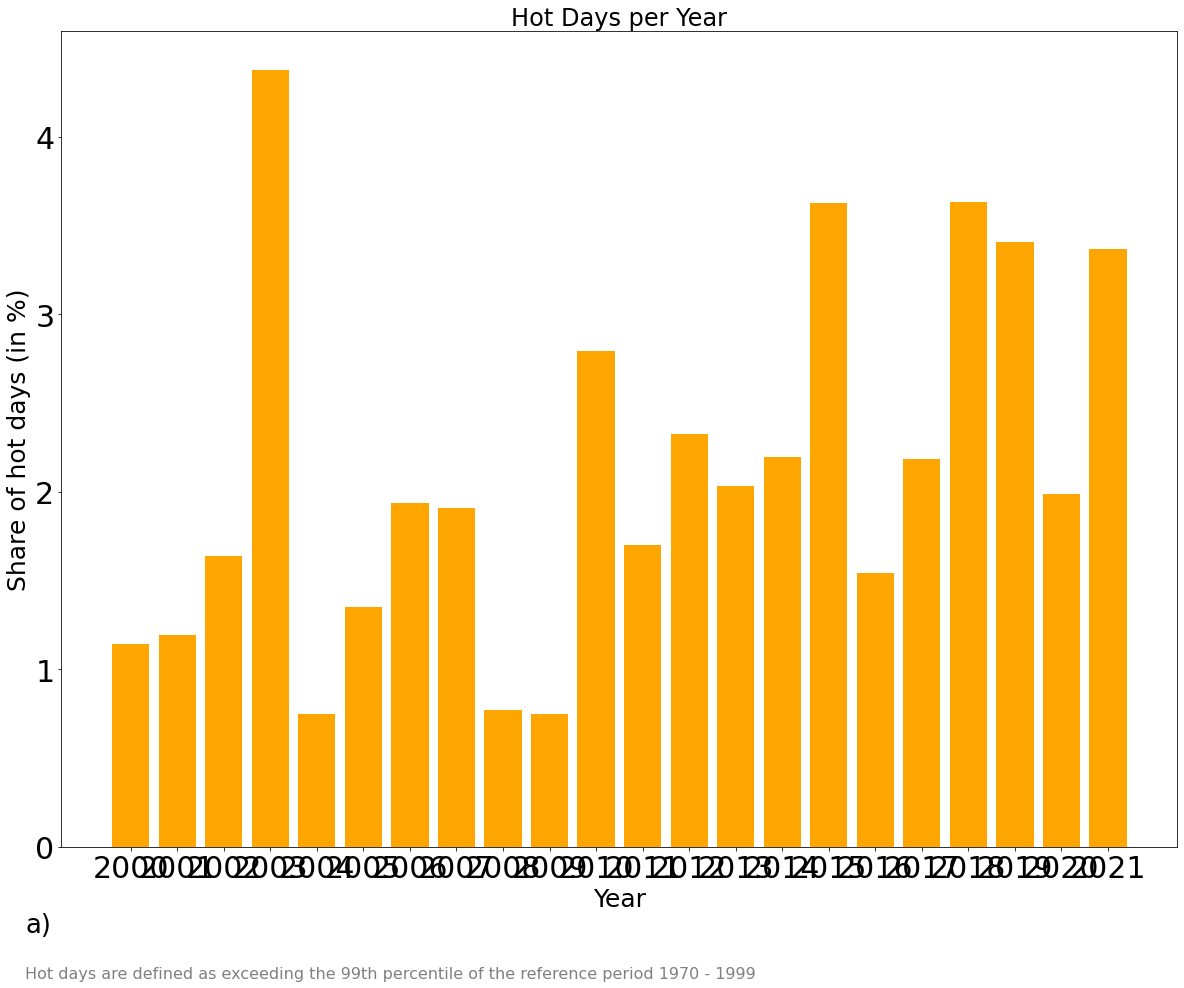

In [73]:
plt.figure(figsize=(20,15))
# plot hot day frequency 
#plt.subplot(1, 2, 1)
plt.bar(hot_days_year['year'], hot_days_year['threshold_exceeded_percent'], color="orange")
plt.title('Hot Days per Year', fontsize=24)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Share of hot days (in %)', fontsize=25)
# add graphics index text
plt.figtext(0.1, 0.04, 'a)', fontsize = 26, ha = 'left',  va = 'bottom', color = 'black')
# add source text
plt.figtext(0.1, 0.001, 'Hot days are defined as exceeding the 99th percentile of the reference period 1970 - 1999', fontsize = 16, ha = 'left',  va = 'bottom', color = 'grey')
plt.tick_params(axis='both', which='major', labelsize=30)

In [74]:
# correlation of year and hot day frequency
hot_days_year['year'] = hot_days_year['year'].astype(int)
hot_days_year['year'].corr(hot_days_year['threshold_exceeded_percent'])

0.4593258813000416

In [75]:
# define slight deviation of previous map plot
def map_plot(data, variable, colors, title): 
    # create figure
    fig, ax = plt.subplots(1, figsize = (10,7.5), dpi = 100)

    # add title and subtitle
    fig = plt.figtext(0.4, 0.88, title, fontsize = 13.5, ha = 'left', fontweight = 3)
    fig = plt.figtext(0.28, 0.1, 'b)', fontsize = 15.6, ha = 'left',  va = 'bottom', color = 'black')

    # remove axis
    fig = ax.set_axis_off()

    # plot map with legend
    fig = data.plot(column = variable, cmap = colors, linewidth = 1.3, ax = ax, edgecolor = '0.8', legend = True)
    return fig 

<AxesSubplot:>

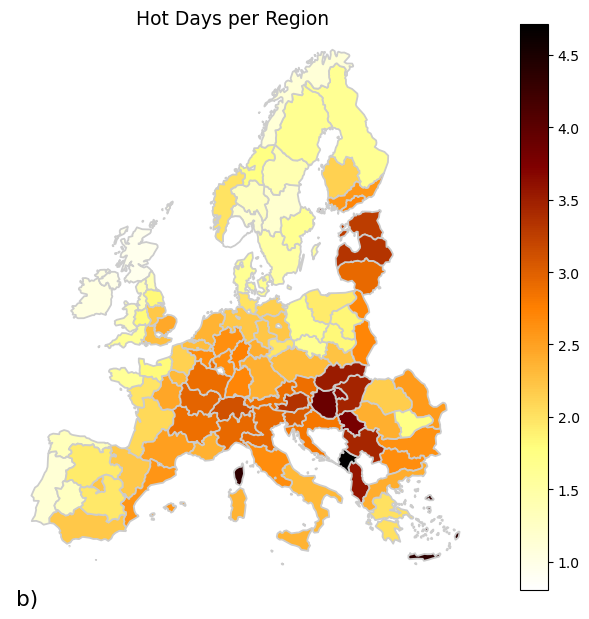

In [76]:
# plot hot day frequency per NUTS 1 region
map_plot(hot_days_region, 'threshold_exceeded_percent', 'afmhot_r', 'Hot Days per Region')

# 5.2 Heatwave Count per Year and Region

## Per Year

In [77]:
# count heatwaves per year
r = pd.DataFrame(heatwave['year'].value_counts())
r=r.reset_index()
r = r.rename(columns={'year': 'heatwave_count', 'index': 'year'})
r['year'] = r['year'].astype(int)
r = r.sort_values(by=['year'])
r.sort_values(by='heatwave_count', ascending=False).head(2)

,year,heatwave_count
0,2018,546
1,2003,544


In [78]:
# correlation
r['year'].corr(r['heatwave_count'])

0.5028252148031659

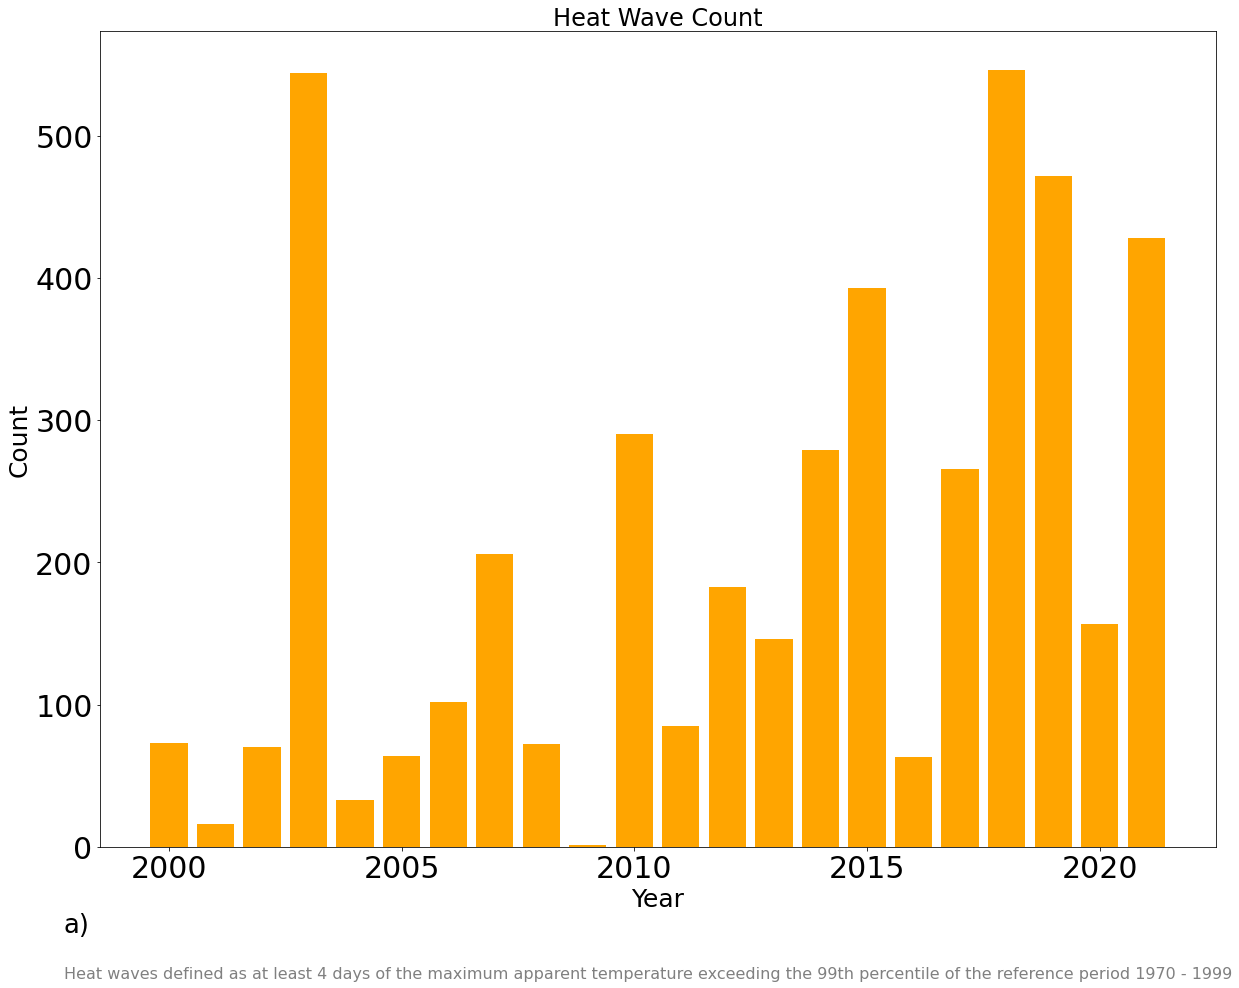

In [79]:
# plot heat wave count 
plt.figure(figsize=(20,15))
plt.bar(r['year'], r['heatwave_count'], color="orange")
plt.title('Heat Wave Count', fontsize=24)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Count', fontsize=25)
# add graphics index text
plt.figtext(0.1, 0.04, 'a)', fontsize = 26, ha = 'left',  va = 'bottom', color = 'black')
# add source text
plt.figtext(0.1, 0.001, 'Heat waves defined as at least 4 days of the maximum apparent temperature exceeding the 99th percentile of the reference period 1970 - 1999', fontsize = 16, ha = 'left',  va = 'bottom', color = 'grey')
plt.tick_params(axis='both', which='major', labelsize=30)

## Per Region

In [80]:
loc = final_df.drop_duplicates(subset='lat_long', keep='first')
s = loc['NUTS1'].value_counts()
s

FI1D    76
SE33    57
NO07    44
SE32    25
SE31    23
        ..
UKC      2
FI2      2
HU1      1
LU0      1
ES3      1
Name: NUTS1, Length: 106, dtype: int64

In [81]:
# count heatwaves per year
r = pd.DataFrame(heatwave['NUTS1'].value_counts())
#r=r.reset_index()
r = r.rename(columns={'NUTS1': 'heatwave_count', 'index': 'NUTS1'})
r = r.merge(s.rename('loc_per_NUTS1'), left_index=True, right_index=True)
r.head()

,heatwave_count,loc_per_NUTS1
FI1D,281,76
SE33,229,57
LV0,141,19
NO0A,109,20
ITC,106,12


In [82]:
r['heatwave_per_loc'] = r['heatwave_count']/r['loc_per_NUTS1']
r.sort_values(by='heatwave_per_loc', ascending=False)

,heatwave_count,loc_per_NUTS1,heatwave_per_loc
FRM,29,2,14.500000
EL4,40,3,13.333333
HU1,12,1,12.000000
FI2,21,2,10.500000
ME0,31,3,10.333333
...,...,...,...
PL9,6,8,0.750000
DED,3,5,0.600000
ES43,5,9,0.555556
NO09,3,7,0.428571


In [83]:
r['heatwave_per_loc'].describe()

count    105.000000
mean       4.174070
std        2.730652
min        0.187500
25%        2.333333
50%        3.666667
75%        5.285714
max       14.500000
Name: heatwave_per_loc, dtype: float64

In [84]:
# limit at 10 for better visualization
r['heatwave_per_loc'] = np.where(r['heatwave_per_loc'] > 10, 10, r['heatwave_per_loc'])
r = r.drop(['heatwave_count', 'loc_per_NUTS1'],1)

In [85]:
# join with geodataframe
HW_NUTS1 = regions.set_index('NUTS_ID').join(r)

In [86]:
# convert to geodataframe
HW_NUTS1 = gpd.GeoDataFrame(HW_NUTS1)
HW_NUTS1.crs = "epsg:3035"
HW_NUTS1 = HW_NUTS1.to_crs('epsg:3035')
HW_NUTS1.sort_values(by='heatwave_per_loc', ascending=False)

,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,heatwave_per_loc
NUTS_ID,,,,,,,,,,
FRM,1,FR,Corse,Corse,0.0,NaN,0,FRM,"POLYGON ((4204641.590 2142132.030, 4218982.040...",10.0
FI2,1,FI,Ã land,Ã land,0.0,NaN,0,FI2,"MULTIPOLYGON (((4930290.065 4207364.036, 49307...",10.0
HU1,1,HU,KÃ¶zÃ©p-MagyarorszÃ¡g,KÃ¶zÃ©p-MagyarorszÃ¡g,0.0,NaN,0,HU1,"POLYGON ((5037028.673 2782124.847, 5040668.505...",10.0
EL4,1,EL,"Nisia Aigaiou, Kriti","ÎÎ·ÏÎ¹Î¬ ÎÎ¹Î³Î±Î¯Î¿Ï , ÎÏÎ®ÏÎ·",0.0,NaN,0,EL4,"MULTIPOLYGON (((5933660.592 1621535.498, 59219...",10.0
ME0,1,ME,Crna Gora,Ð¦ÑÐ½Ð° ÐÐ¾ÑÐ°,0.0,NaN,0,ME0,"POLYGON ((5066457.268 2314658.245, 5106789.821...",10.0
...,...,...,...,...,...,...,...,...,...,...
TRC21,3,TR,ÅanlÄ±urfa,ÅanlÄ±urfa,4.0,2.0,3,TRC21,"POLYGON ((6904684.585 2120354.802, 6938677.828...",NaN
TRC22,3,TR,DiyarbakÄ±r,DiyarbakÄ±r,4.0,2.0,3,TRC22,"POLYGON ((6989716.599 2273670.524, 6982786.486...",NaN
NO0B2,3,NO,Svalbard,Svalbard,3.0,3.0,1,NO0B2,"MULTIPOLYGON (((4754167.335 6382461.408, 47465...",NaN


<AxesSubplot:>

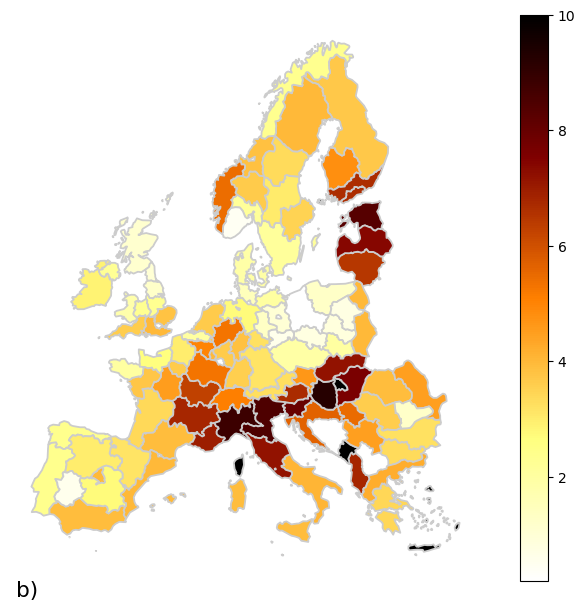

In [89]:
# plot heat wave frequency
map_plot(HW_NUTS1, 'heatwave_per_loc', 'afmhot_r', '')

# 5.3 Heat wave duration per year and region

## Per Year

In [87]:
# count heatwaves per year
r = pd.DataFrame(heatwave.groupby('year')['consecutive_HW_days'].mean())
r=r.reset_index()
#r = r.rename(columns={'year': 'heatwave_count', 'index': 'year'})
r['year'] = r['year'].astype(int)
#r = r.sort_values(by=['year'])
r.sort_values(by='consecutive_HW_days', ascending=False).head(2)

,year,consecutive_HW_days
3,2003,6.321691
7,2007,5.514563


In [88]:
r['year'].corr(r['consecutive_HW_days'])

0.14232243206190595

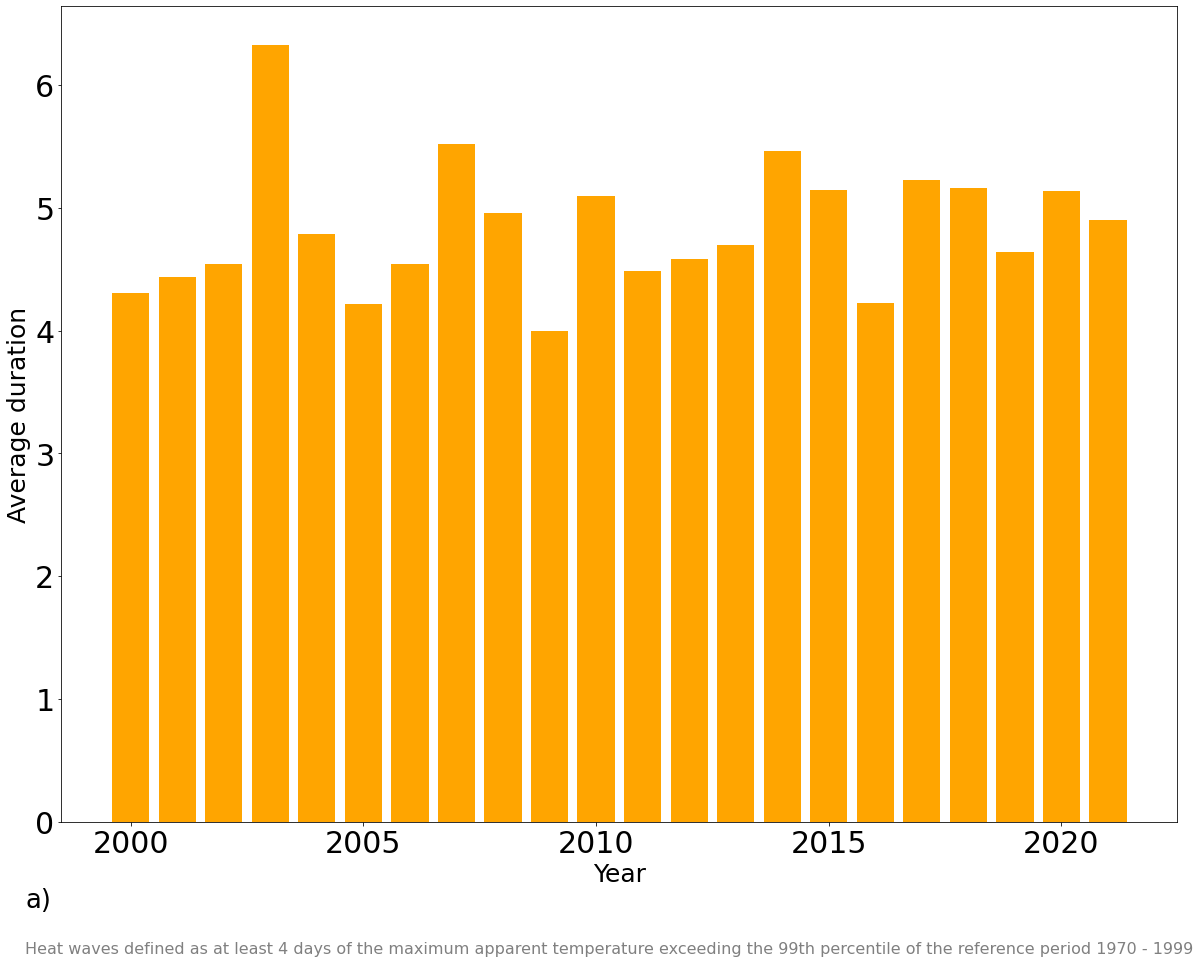

In [89]:
# plot heat wave count 
plt.figure(figsize=(20,15))
plt.bar(r['year'], r['consecutive_HW_days'], color="orange")
plt.title('', fontsize=24)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Average duration', fontsize=25)
# add graphics index text
plt.figtext(0.1, 0.04, 'a)', fontsize = 26, ha = 'left',  va = 'bottom', color = 'black')
# add source text
plt.figtext(0.1, 0.001, 'Heat waves defined as at least 4 days of the maximum apparent temperature exceeding the 99th percentile of the reference period 1970 - 1999', fontsize = 16, ha = 'left',  va = 'bottom', color = 'grey')
plt.tick_params(axis='both', which='major', labelsize=30)

## Per Region

In [90]:
# count heatwaves per year
r = pd.DataFrame(heatwave.groupby('NUTS1')['consecutive_HW_days'].mean())
#r=r.reset_index()
#r = r.rename(columns={'year': 'heatwave_count', 'index': 'year'})
#r['NUTS1'] = r['NUTS1'].astype(int)
#r = r.sort_values(by=['year'])
r.sort_values(by='consecutive_HW_days', ascending=False).head(2)

,consecutive_HW_days
NUTS1,
FI2,7.380952
LU0,6.500000


In [91]:
# join with geodataframe
HW_NUTS1 = regions.set_index('NUTS_ID').join(r)

In [92]:
# convert to geodataframe
HW_NUTS1 = gpd.GeoDataFrame(HW_NUTS1)
HW_NUTS1.crs = "epsg:3035"
HW_NUTS1 = HW_NUTS1.to_crs('epsg:3035')
HW_NUTS1.sort_values(by='consecutive_HW_days', ascending=False)

,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,consecutive_HW_days
NUTS_ID,,,,,,,,,,
FI2,1,FI,Ã land,Ã land,0.0,NaN,0,FI2,"MULTIPOLYGON (((4930290.065 4207364.036, 49307...",7.380952
LU0,1,LU,Luxembourg,Luxembourg,0.0,NaN,0,LU0,"POLYGON ((4044953.867 3009232.573, 4046925.344...",6.500000
FR1,1,FR,Ile-de-France,Ile-de-France,0.0,NaN,0,FR1,"POLYGON ((3718146.351 2936165.920, 3723566.507...",6.363636
FRM,1,FR,Corse,Corse,0.0,NaN,0,FRM,"POLYGON ((4204641.590 2142132.030, 4218982.040...",6.275862
FI1B,2,FI,Helsinki-Uusimaa,Helsinki-Uusimaa,0.0,NaN,0,FI1B,"POLYGON ((5198275.405 4285300.518, 5221248.735...",6.250000
...,...,...,...,...,...,...,...,...,...,...
TRC21,3,TR,ÅanlÄ±urfa,ÅanlÄ±urfa,4.0,2.0,3,TRC21,"POLYGON ((6904684.585 2120354.802, 6938677.828...",NaN
TRC22,3,TR,DiyarbakÄ±r,DiyarbakÄ±r,4.0,2.0,3,TRC22,"POLYGON ((6989716.599 2273670.524, 6982786.486...",NaN
NO0B2,3,NO,Svalbard,Svalbard,3.0,3.0,1,NO0B2,"MULTIPOLYGON (((4754167.335 6382461.408, 47465...",NaN


<AxesSubplot:>

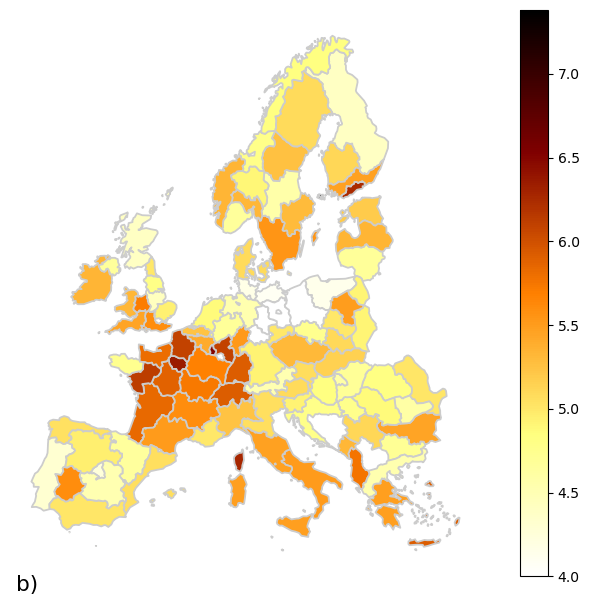

In [93]:
map_plot(HW_NUTS1, 'consecutive_HW_days', 'afmhot_r', '')

## Mortality during heat waves (2000 - 2021) for boxplot

### Per 100,000 inhabitants

In [141]:
# for each location, compute the yearly mean
avg_demo = pd.DataFrame(final_df.groupby(['lat_long', 'year'])['death_p_100k'].mean())
avg_demo = avg_demo.add_suffix('_avg')
avg_demo = avg_demo.reset_index(level=['lat_long', 'year'])
avg_demo = avg_demo.rename(columns={'NUTS1_avg': 'NUTS1'})
#df.groupby('A').mean()
avg_demo.head()

,lat_long,year,death_p_100k_avg
0,"('37.0', '-2.5')",2000,14.233020
1,"('37.0', '-2.5')",2001,14.854212
2,"('37.0', '-2.5')",2002,14.199115
3,"('37.0', '-2.5')",2003,15.620043
4,"('37.0', '-2.5')",2004,14.271722


In [142]:
avg_demo.shape

(25432, 3)

In [143]:
# get three-year rolling average of weekly mortality centered at year per locations
avg_demo['death_p_100k_3_avg'] = avg_demo.groupby('lat_long')['death_p_100k_avg'].rolling(window=3, center=True).mean().reset_index(0,drop=True)
avg_demo.head(25)

,lat_long,year,death_p_100k_avg,death_p_100k_3_avg
0,"('37.0', '-2.5')",2000,14.233020,NaN
1,"('37.0', '-2.5')",2001,14.854212,14.428782
2,"('37.0', '-2.5')",2002,14.199115,14.891123
3,"('37.0', '-2.5')",2003,15.620043,14.696960
4,"('37.0', '-2.5')",2004,14.271722,14.518674
5,"('37.0', '-2.5')",2005,13.664258,13.999105
6,"('37.0', '-2.5')",2006,14.061336,13.885113
7,"('37.0', '-2.5')",2007,13.929744,13.938454
8,"('37.0', '-2.5')",2008,13.824281,13.738249
9,"('37.0', '-2.5')",2009,13.460721,13.624645


Missing values for 2021 and 2000 as no average centered at these year can be computed due to data from 1999 and 2022 not being available.

In [144]:
# impute NaN of years 2000 with the average centered at 2001
avg_demo['year'] = avg_demo['year'].astype(str)
df_21 = avg_demo[avg_demo['year'] == '2021']
avg_demo = avg_demo[avg_demo['year'] != '2021']
avg_demo['death_p_100k_3_avg'].fillna(method='bfill', inplace=True)
avg_demo.head(5)

,lat_long,year,death_p_100k_avg,death_p_100k_3_avg
0,"('37.0', '-2.5')",2000,14.233020,14.428782
1,"('37.0', '-2.5')",2001,14.854212,14.428782
2,"('37.0', '-2.5')",2002,14.199115,14.891123
3,"('37.0', '-2.5')",2003,15.620043,14.696960
4,"('37.0', '-2.5')",2004,14.271722,14.518674


In [145]:
# impute NaN for 2021 with the averages for only 2021 to account for higher death rates because of Covid
df_21['death_p_100k_3_avg'] = df_21['death_p_100k_avg']
frames = [avg_demo,df_21]
avg_demo = pd.concat(frames)
avg_demo.sort_values(by=['lat_long', 'year'], inplace=True)
avg_demo.head(25)

,lat_long,year,death_p_100k_avg,death_p_100k_3_avg
0,"('37.0', '-2.5')",2000,14.233020,14.428782
1,"('37.0', '-2.5')",2001,14.854212,14.428782
2,"('37.0', '-2.5')",2002,14.199115,14.891123
3,"('37.0', '-2.5')",2003,15.620043,14.696960
4,"('37.0', '-2.5')",2004,14.271722,14.518674
5,"('37.0', '-2.5')",2005,13.664258,13.999105
6,"('37.0', '-2.5')",2006,14.061336,13.885113
7,"('37.0', '-2.5')",2007,13.929744,13.938454
8,"('37.0', '-2.5')",2008,13.824281,13.738249
9,"('37.0', '-2.5')",2009,13.460721,13.624645


In [146]:
# keep only the three-year averages for each year for each location
avg_demo = avg_demo.drop(['death_p_100k_avg'],1)
avg_demo = avg_demo.rename(columns={'death_p_100k_3_avg': 'death_p_100k_avg'})
avg_demo.head(1)

,lat_long,year,death_p_100k_avg
0,"('37.0', '-2.5')",2000,14.428782


In [147]:
heatwave['year'] = heatwave['year'].astype(str)

In [148]:
# merge big dataset with average mortality
w = heatwave.merge(avg_demo, how='inner', on=['lat_long', 'year'])
w.head()

,heatwave_id,country,NUTS1,lat_long,date,date,latitude,longitude,NUTS2,Week_Number,99th_percentile,month,year,threshold_exceeded,consecutive_HW_days,heat_wave_day,health_expend_p_capita,Asthma,Chronic_depression,Chronic_lower_respiratory_diseases,Coronary_heart_disease_or_angina_pectoris,Diabetes,Heart_attack_or_chronic_consequences_of_heart_attack,High_blood_pressure,Kidney_problems,Stroke_or_chronic_consequences_of_stroke,week_nr,deaths,population,share_over_65,death_p_100k,death_p_100k_avg
0,10024,BE,BE3,"('50.5', '5.75')",2003-08-03,2003-08-12,50.50,5.75,BE33,W31,29.609960,8.0,2003,10,10,10,2495.490000,5.05,7.0,4.00,1.50,5.55,0.9,16.95,0.95,0.9,2003W31,762.900000,3368250.0,16.761523,22.649744,19.828199
1,10036,BE,BE3,"('49.75', '5.75')",2003-08-02,2003-08-13,49.75,5.75,BE34,W31,29.406890,8.0,2003,12,12,12,2495.490000,5.05,7.0,4.00,1.50,5.55,0.9,16.95,0.95,0.9,2003W31,762.916667,3368250.0,16.761523,22.650239,19.828199
2,10046,FR,FRF,"('49.0', '5.75')",2003-08-02,2003-08-13,49.00,5.75,FRF3,W31,31.552300,8.0,2003,12,12,12,2775.075627,8.30,6.8,5.95,2.05,8.65,1.2,15.45,2.75,1.1,2003W31,NaN,5446445.0,15.476738,NaN,16.142656
3,10064,FR,FRF,"('48.25', '5.75')",2003-08-02,2003-08-13,48.25,5.75,FRF3,W31,31.399587,8.0,2003,12,12,12,2775.075627,8.30,6.8,5.95,2.05,8.65,1.2,15.45,2.75,1.1,2003W31,NaN,5446445.0,15.476738,NaN,16.142656
4,10084,FR,FRC,"('47.5', '5.75')",2003-08-02,2003-08-13,47.50,5.75,FRC2,W31,33.250386,8.0,2003,12,12,12,2775.075627,8.30,6.8,5.95,2.05,8.65,1.2,15.45,2.75,1.1,2003W31,NaN,2756739.0,18.120758,NaN,17.648734


In [150]:
# get relative mortality
w['death_p_100k_vs_avg'] = w['death_p_100k']/w['death_p_100k_avg']
w.head()

,heatwave_id,country,NUTS1,lat_long,date,date,latitude,longitude,NUTS2,Week_Number,99th_percentile,month,year,threshold_exceeded,consecutive_HW_days,heat_wave_day,health_expend_p_capita,Asthma,Chronic_depression,Chronic_lower_respiratory_diseases,Coronary_heart_disease_or_angina_pectoris,Diabetes,Heart_attack_or_chronic_consequences_of_heart_attack,High_blood_pressure,Kidney_problems,Stroke_or_chronic_consequences_of_stroke,week_nr,deaths,population,share_over_65,death_p_100k,death_p_100k_avg,death_p_100k_vs_avg
0,10024,BE,BE3,"('50.5', '5.75')",2003-08-03,2003-08-12,50.50,5.75,BE33,W31,29.609960,8.0,2003,10,10,10,2495.490000,5.05,7.0,4.00,1.50,5.55,0.9,16.95,0.95,0.9,2003W31,762.900000,3368250.0,16.761523,22.649744,19.828199,1.142300
1,10036,BE,BE3,"('49.75', '5.75')",2003-08-02,2003-08-13,49.75,5.75,BE34,W31,29.406890,8.0,2003,12,12,12,2495.490000,5.05,7.0,4.00,1.50,5.55,0.9,16.95,0.95,0.9,2003W31,762.916667,3368250.0,16.761523,22.650239,19.828199,1.142325
2,10046,FR,FRF,"('49.0', '5.75')",2003-08-02,2003-08-13,49.00,5.75,FRF3,W31,31.552300,8.0,2003,12,12,12,2775.075627,8.30,6.8,5.95,2.05,8.65,1.2,15.45,2.75,1.1,2003W31,NaN,5446445.0,15.476738,NaN,16.142656,NaN
3,10064,FR,FRF,"('48.25', '5.75')",2003-08-02,2003-08-13,48.25,5.75,FRF3,W31,31.399587,8.0,2003,12,12,12,2775.075627,8.30,6.8,5.95,2.05,8.65,1.2,15.45,2.75,1.1,2003W31,NaN,5446445.0,15.476738,NaN,16.142656,NaN
4,10084,FR,FRC,"('47.5', '5.75')",2003-08-02,2003-08-13,47.50,5.75,FRC2,W31,33.250386,8.0,2003,12,12,12,2775.075627,8.30,6.8,5.95,2.05,8.65,1.2,15.45,2.75,1.1,2003W31,NaN,2756739.0,18.120758,NaN,17.648734,NaN


In [155]:
# inspect Flanders
w[w['NUTS1']=='BE2']

,heatwave_id,country,NUTS1,lat_long,date,date,latitude,longitude,NUTS2,Week_Number,99th_percentile,month,year,threshold_exceeded,consecutive_HW_days,heat_wave_day,health_expend_p_capita,Asthma,Chronic_depression,Chronic_lower_respiratory_diseases,Coronary_heart_disease_or_angina_pectoris,Diabetes,Heart_attack_or_chronic_consequences_of_heart_attack,High_blood_pressure,Kidney_problems,Stroke_or_chronic_consequences_of_stroke,week_nr,deaths,population,share_over_65,death_p_100k,death_p_100k_avg,death_p_100k_vs_avg
3092,73354,BE,BE2,"('51.25', '4.25')",2020-08-07,2020-08-12,51.25,4.25,BE23,W32,31.199360,8.0,2020,6,6,6,4536.898582,5.05,7.0,4.0,1.5,5.55,0.9,16.95,0.95,0.9,2020W32,1423.000000,6639005.0,20.448621,21.433935,16.909645,1.267557
3124,73684,BE,BE2,"('51.25', '5.0')",2018-07-24,2018-07-27,51.25,5.00,BE21,W30,31.416688,7.0,2018,4,4,4,4336.850000,5.05,7.0,4.0,1.5,5.55,0.9,16.95,0.95,0.9,2018W30,1192.000000,6559294.0,19.973430,18.172687,16.617766,1.093570
3125,73694,BE,BE2,"('51.25', '5.0')",2019-07-23,2019-07-26,51.25,5.00,BE21,W30,31.416688,7.0,2019,4,4,4,4418.100000,5.05,7.0,4.0,1.5,5.55,0.9,16.95,0.95,0.9,2019W30,1269.000000,6596233.0,20.195512,19.238253,16.875033,1.140042
3126,73700,BE,BE2,"('51.25', '5.0')",2020-08-07,2020-08-13,51.25,5.00,BE21,W32,31.416688,8.0,2020,7,7,7,4536.898582,5.05,7.0,4.0,1.5,5.55,0.9,16.95,0.95,0.9,2020W32,1457.571429,6639005.0,20.448621,21.954667,16.909645,1.298352


In [157]:
# get mean per year per region
avg_mortality_2000 = pd.DataFrame(w.groupby(['NUTS1', 'year'])['death_p_100k_vs_avg'].mean())
avg_mortality_2000

death_p_100k_vs_avg
NUTS1 year                     
AL0   2003                  NaN
      2006                  NaN
      2007                  NaN
      2012                  NaN
      2015             1.325116
...                         ...
UKN   2003                  NaN
      2006                  NaN
      2013                  NaN
      2014                  NaN
      2021                  NaN

[740 rows x 1 columns]

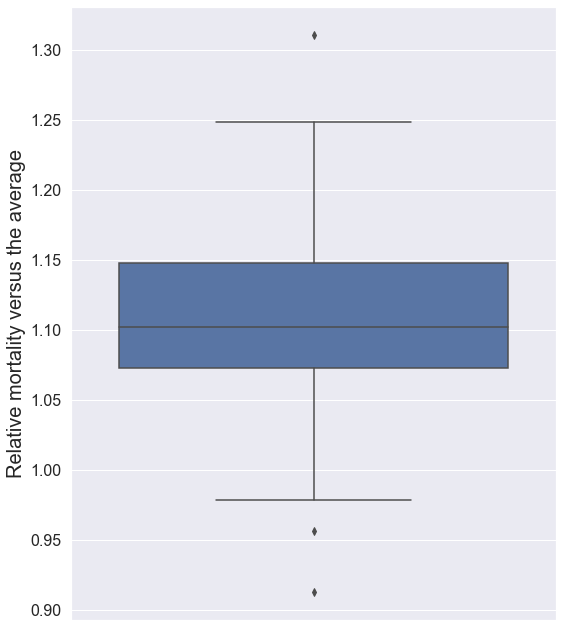

In [153]:
# plot dispersion of average heat wave mortality by NUTS 1 region
import seaborn as sns
sns.set(rc={'figure.figsize':(8.7,11.27)})
#sns.set_theme(style="whitegrid")
#tips = sns.load_dataset("tips")
ax = sns.boxplot(y=avg_mortality_2000["death_p_100k_vs_avg"])
ax.set_ylabel('Relative mortality versus the average',fontsize=20)
ax.tick_params(labelsize=16)

## Mortality during heat waves (2013 - 2021) for regional visualization

### Get average mortality per location

In [94]:
# only consider heat waves after 2012
final_df['year'] = final_df['year'].astype(int)
sub = final_df[final_df['year'] >= 2013]

In [95]:
# for each location, compute the yearly mean
avg_demo = pd.DataFrame(sub.groupby(['lat_long', 'year'])['death_p_100k'].mean())
avg_demo = avg_demo.add_suffix('_avg')
avg_demo = avg_demo.reset_index(level=['lat_long', 'year'])
avg_demo = avg_demo.rename(columns={'NUTS1_avg': 'NUTS1'})
#df.groupby('A').mean()
avg_demo.head()

,lat_long,year,death_p_100k_avg
0,"('37.0', '-2.5')",2013,13.524869
1,"('37.0', '-2.5')",2014,13.545662
2,"('37.0', '-2.5')",2015,14.241080
3,"('37.0', '-2.5')",2016,14.356478
4,"('37.0', '-2.5')",2017,14.275906


In [96]:
# inspect shape
avg_demo.shape

(10404, 3)

In [97]:
# get three-year rolling average of weekly mortality centered at year per locations
avg_demo['death_p_100k_3_avg'] = avg_demo.groupby('lat_long')['death_p_100k_avg'].rolling(window=3, center=True).mean().reset_index(0,drop=True)
avg_demo.head(25)

,lat_long,year,death_p_100k_avg,death_p_100k_3_avg
0,"('37.0', '-2.5')",2013,13.524869,NaN
1,"('37.0', '-2.5')",2014,13.545662,13.770537
2,"('37.0', '-2.5')",2015,14.241080,14.047740
3,"('37.0', '-2.5')",2016,14.356478,14.291155
4,"('37.0', '-2.5')",2017,14.275906,14.309602
5,"('37.0', '-2.5')",2018,14.296421,14.296314
6,"('37.0', '-2.5')",2019,14.316614,14.639659
7,"('37.0', '-2.5')",2020,15.305943,15.323043
8,"('37.0', '-2.5')",2021,16.346572,NaN
9,"('37.0', '-3.25')",2013,13.524869,NaN


Missing values for 2021 and 2000 as no average centered at these year can be computed due to data from 1999 and 2022 not being available.

In [98]:
# impute NaN of years 2000 with the average centered at 2001
avg_demo['year'] = avg_demo['year'].astype(str)
df_21 = avg_demo[avg_demo['year'] == '2021']
avg_demo = avg_demo[avg_demo['year'] != '2021']
avg_demo['death_p_100k_3_avg'].fillna(method='bfill', inplace=True)
avg_demo.head(5)

,lat_long,year,death_p_100k_avg,death_p_100k_3_avg
0,"('37.0', '-2.5')",2013,13.524869,13.770537
1,"('37.0', '-2.5')",2014,13.545662,13.770537
2,"('37.0', '-2.5')",2015,14.241080,14.047740
3,"('37.0', '-2.5')",2016,14.356478,14.291155
4,"('37.0', '-2.5')",2017,14.275906,14.309602


In [99]:
# impute NaN for 2021 with the averages for only 2021 to account for higher death rates because of Covid
df_21['death_p_100k_3_avg'] = df_21['death_p_100k_avg']
frames = [avg_demo,df_21]
avg_demo = pd.concat(frames)
avg_demo.sort_values(by=['lat_long', 'year'], inplace=True)
avg_demo.head(25)

,lat_long,year,death_p_100k_avg,death_p_100k_3_avg
0,"('37.0', '-2.5')",2013,13.524869,13.770537
1,"('37.0', '-2.5')",2014,13.545662,13.770537
2,"('37.0', '-2.5')",2015,14.241080,14.047740
3,"('37.0', '-2.5')",2016,14.356478,14.291155
4,"('37.0', '-2.5')",2017,14.275906,14.309602
5,"('37.0', '-2.5')",2018,14.296421,14.296314
6,"('37.0', '-2.5')",2019,14.316614,14.639659
7,"('37.0', '-2.5')",2020,15.305943,15.323043
8,"('37.0', '-2.5')",2021,16.346572,16.346572
9,"('37.0', '-3.25')",2013,13.524869,13.770537


In [100]:
# keep only the three-year averages for each year for each location
avg_demo = avg_demo.drop(['death_p_100k_avg'],1)
avg_demo = avg_demo.rename(columns={'death_p_100k_3_avg': 'death_p_100k_avg'})
avg_demo.head(1)

,lat_long,year,death_p_100k_avg
0,"('37.0', '-2.5')",2013,13.770537


In [101]:
heatwave['year'] = heatwave['year'].astype(str)

In [102]:
# merge heat wave data with average mortality
w = heatwave.merge(avg_demo, how='inner', on=['lat_long', 'year'])
w.head()

,heatwave_id,country,NUTS1,lat_long,date,date,latitude,longitude,NUTS2,Week_Number,99th_percentile,month,year,threshold_exceeded,consecutive_HW_days,heat_wave_day,health_expend_p_capita,Asthma,Chronic_depression,Chronic_lower_respiratory_diseases,Coronary_heart_disease_or_angina_pectoris,Diabetes,Heart_attack_or_chronic_consequences_of_heart_attack,High_blood_pressure,Kidney_problems,Stroke_or_chronic_consequences_of_stroke,week_nr,deaths,population,share_over_65,death_p_100k,death_p_100k_avg
0,33074,IE,IE0,"('53.5', '-10.0')",2013-07-08,2013-07-11,53.50,-10.00,IE04,W28,23.318686,7.0,2013,4,4,4,3999.95,8.15,8.0,2.5,2.4,4.05,1.2,13.55,2.8,0.7,2013W28,NaN,4609779.0,12.236465,NaN,20.694055
1,33080,IE,IE0,"('52.0', '-10.0')",2013-07-07,2013-07-11,52.00,-10.00,IE05,W27,24.850956,7.0,2013,5,5,5,3999.95,8.15,8.0,2.5,2.4,4.05,1.2,13.55,2.8,0.7,2013W27,NaN,4609779.0,12.236465,NaN,20.641335
2,33090,IE,IE0,"('54.25', '-9.25')",2013-07-19,2013-07-22,54.25,-9.25,IE04,W29,21.349038,7.0,2013,4,4,4,3999.95,8.15,8.0,2.5,2.4,4.05,1.2,13.55,2.8,0.7,2013W29,NaN,4609779.0,12.236465,NaN,20.694055
3,33096,IE,IE0,"('53.5', '-9.25')",2013-07-08,2013-07-12,53.50,-9.25,IE04,W28,25.780895,7.0,2013,5,5,5,3999.95,8.15,8.0,2.5,2.4,4.05,1.2,13.55,2.8,0.7,2013W28,NaN,4609779.0,12.236465,NaN,20.694055
4,33102,IE,IE0,"('52.75', '-9.25')",2013-07-08,2013-07-11,52.75,-9.25,IE05,W28,25.984777,7.0,2013,4,4,4,3999.95,8.15,8.0,2.5,2.4,4.05,1.2,13.55,2.8,0.7,2013W28,NaN,4609779.0,12.236465,NaN,20.641335


In [103]:
# get relative mortality
w['death_p_100k_vs_avg'] = w['death_p_100k']/w['death_p_100k_avg']
w.head()

,heatwave_id,country,NUTS1,lat_long,date,date,latitude,longitude,NUTS2,Week_Number,99th_percentile,month,year,threshold_exceeded,consecutive_HW_days,heat_wave_day,health_expend_p_capita,Asthma,Chronic_depression,Chronic_lower_respiratory_diseases,Coronary_heart_disease_or_angina_pectoris,Diabetes,Heart_attack_or_chronic_consequences_of_heart_attack,High_blood_pressure,Kidney_problems,Stroke_or_chronic_consequences_of_stroke,week_nr,deaths,population,share_over_65,death_p_100k,death_p_100k_avg,death_p_100k_vs_avg
0,33074,IE,IE0,"('53.5', '-10.0')",2013-07-08,2013-07-11,53.50,-10.00,IE04,W28,23.318686,7.0,2013,4,4,4,3999.95,8.15,8.0,2.5,2.4,4.05,1.2,13.55,2.8,0.7,2013W28,NaN,4609779.0,12.236465,NaN,20.694055,NaN
1,33080,IE,IE0,"('52.0', '-10.0')",2013-07-07,2013-07-11,52.00,-10.00,IE05,W27,24.850956,7.0,2013,5,5,5,3999.95,8.15,8.0,2.5,2.4,4.05,1.2,13.55,2.8,0.7,2013W27,NaN,4609779.0,12.236465,NaN,20.641335,NaN
2,33090,IE,IE0,"('54.25', '-9.25')",2013-07-19,2013-07-22,54.25,-9.25,IE04,W29,21.349038,7.0,2013,4,4,4,3999.95,8.15,8.0,2.5,2.4,4.05,1.2,13.55,2.8,0.7,2013W29,NaN,4609779.0,12.236465,NaN,20.694055,NaN
3,33096,IE,IE0,"('53.5', '-9.25')",2013-07-08,2013-07-12,53.50,-9.25,IE04,W28,25.780895,7.0,2013,5,5,5,3999.95,8.15,8.0,2.5,2.4,4.05,1.2,13.55,2.8,0.7,2013W28,NaN,4609779.0,12.236465,NaN,20.694055,NaN
4,33102,IE,IE0,"('52.75', '-9.25')",2013-07-08,2013-07-11,52.75,-9.25,IE05,W28,25.984777,7.0,2013,4,4,4,3999.95,8.15,8.0,2.5,2.4,4.05,1.2,13.55,2.8,0.7,2013W28,NaN,4609779.0,12.236465,NaN,20.641335,NaN


In [105]:
# get shape
w.shape

(2750, 33)

## Plot heatwave mortality by NUTS1 region

In [108]:
avg_mortality = w.groupby('NUTS1')['death_p_100k_vs_avg'].mean()
avg_mortality = pd.DataFrame(avg_mortality)
#HW_days = HW_days.rename(columns={"heat_wave_day": "days"})
avg_mortality.head(2)

,death_p_100k_vs_avg
NUTS1,
AL0,1.248484
AT1,1.179469


In [109]:
# loading shx file
regions = gpd.read_file('NUTS_RG_20M_2021_3035.shx')
# There is a problem with NUTS 2 regions from Norway as the NUTS codes have recently changed
regions[(regions['CNTR_CODE'] == 'NO') & (regions['LEVL_CODE'] == 2)]

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
1940,NO02,2,NO,Innlandet,Innlandet,0.0,NaN,0,NO02,"POLYGON ((4226322.205 4220417.267, 4217247.246..."
1941,NO06,2,NO,TrÃ¸ndelag,TrÃ¸ndelag,0.0,NaN,0,NO06,"MULTIPOLYGON (((4525407.639 4674222.130, 44993..."
1942,NO08,2,NO,Oslo og Viken,Oslo og Viken,0.0,0.0,0,NO08,"POLYGON ((4226322.205 4220417.267, 4276802.361..."
1943,NO09,2,NO,Agder og SÃ¸r-Ãstlandet,Agder og SÃ¸r-Ãstlandet,0.0,0.0,0,NO09,"POLYGON ((4339135.109 4065666.746, 4342546.778..."
1944,NO0A,2,NO,Vestlandet,Vestlandet,0.0,0.0,0,NO0A,"MULTIPOLYGON (((4258515.326 4480648.690, 42645..."
1961,NO07,2,NO,Nord-Norge,Nord-Norge,0.0,NaN,0,NO07,"MULTIPOLYGON (((5073773.420 5207018.495, 50670..."
2008,NO0B,2,NO,Jan Mayen and Svalbard,Jan Mayen and Svalbard,NaN,NaN,0,NO0B,"MULTIPOLYGON (((4754167.335 6382461.408, 47465..."


In [110]:
n = w[w['country'] == 'NO']
n['NUTS1'].unique()

array(['NO0A', 'NO02', 'NO06', 'NO08', 'NO09', 'NO07'], dtype=object)

In [111]:
n = n.dropna(subset=['death_p_100k_vs_avg'])
n['NUTS1'].unique()

array(['NO02', 'NO06', 'NO07'], dtype=object)

In [112]:
# join with geodataframe
avg_mortality1 = regions.set_index('NUTS_ID').join(avg_mortality)
avg_mortality1.head()
#HW_days_country = HW_days_country.drop(['total_days', 'heat_wave_days'], 1)

,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,death_p_100k_vs_avg
NUTS_ID,,,,,,,,,,
FR,0,FR,France,France,0.0,NaN,0,FR,"MULTIPOLYGON (((9954236.116 -3059379.316, 9961...",NaN
HR,0,HR,Hrvatska,Hrvatska,0.0,NaN,0,HR,"MULTIPOLYGON (((4827385.889 2618351.326, 48483...",NaN
HU,0,HU,MagyarorszÃ¡g,MagyarorszÃ¡g,0.0,NaN,0,HU,"POLYGON ((5214660.069 2880853.832, 5216710.220...",NaN
AL,0,AL,ShqipÃ«ria,ShqipÃ«ria,0.0,NaN,0,AL,"POLYGON ((5129579.170 2204098.752, 5148385.473...",NaN
AT,0,AT,Ãsterreich,Ãsterreich,0.0,NaN,0,AT,"POLYGON ((4742889.368 2876362.725, 4783217.798...",NaN


In [113]:
avg_mortality1[avg_mortality1['CNTR_CODE'] == 'IE']

,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,death_p_100k_vs_avg
NUTS_ID,,,,,,,,,,
IE,0,IE,Ãire/Ireland,Ãire/Ireland,0.0,NaN,0,IE,"MULTIPOLYGON (((3230329.820 3682748.467, 31996...",NaN
IE0,1,IE,Ireland,Ireland,0.0,NaN,0,IE0,"MULTIPOLYGON (((3230329.820 3682748.467, 31996...",1.100549
IE04,2,IE,Northern and Western,Northern and Western,0.0,NaN,0,IE04,"MULTIPOLYGON (((3230329.820 3682748.467, 31996...",NaN
IE05,2,IE,Southern,Southern,0.0,NaN,0,IE05,"MULTIPOLYGON (((3141980.683 3441399.745, 31755...",NaN
IE06,2,IE,Eastern and Midland,Eastern and Midland,0.0,NaN,0,IE06,"POLYGON ((3258608.927 3511383.283, 3264152.233...",NaN
IE041,3,IE,Border,Border,4.0,3.0,1,IE041,"MULTIPOLYGON (((3230329.820 3682748.467, 31996...",NaN
IE042,3,IE,West,West,4.0,3.0,1,IE042,"MULTIPOLYGON (((3154715.126 3558121.125, 31534...",NaN
IE051,3,IE,Mid-West,Mid-West,4.0,3.0,1,IE051,"POLYGON ((3141980.683 3441399.745, 3150146.327...",NaN
IE052,3,IE,South-East,South-East,4.0,3.0,1,IE052,"POLYGON ((3240880.333 3412798.444, 3224430.895...",NaN


In [114]:
# drop Canary Islands, Svalbard (Norway) and Iceland for better visualization
avg_mortality1 = avg_mortality1.drop(['ES7', 'NO0B2', 'NO0B', 'NO0B1', 'IS0', 'NO', 'NO0'])

In [115]:
# imputing changed Norwegian NUTS codes
# Oslo og Akershus
avg_mortality1['death_p_100k_vs_avg'] = np.where(avg_mortality1['FID'] == 'NO08', 1, avg_mortality1['death_p_100k_vs_avg'])
# Agder og Rogaland
avg_mortality1['death_p_100k_vs_avg'] = np.where(avg_mortality1['FID'] == 'NO09', 1, avg_mortality1['death_p_100k_vs_avg'])
# Vestlandet
avg_mortality1['death_p_100k_vs_avg'] = np.where(avg_mortality1['FID'] == 'NO0A', 1, avg_mortality1['death_p_100k_vs_avg'])

In [116]:
# convert to geodataframe
avg_mortality1 = gpd.GeoDataFrame(avg_mortality1)
avg_mortality1.crs = "epsg:3035"
avg_mortality1 = avg_mortality1.to_crs('epsg:3035')
#avg_mortality1 = avg_mortality1[avg_mortality1['LEVL_CODE'] == 1]
#r = final_df['NUTS1'].unique()
#avg_mortality1 = avg_mortality1[avg_mortality1.index.isin(r)]
#avg_mortality1['death_p_100k_vs_avg'] = np.where(pd.isna(avg_mortality1['death_p_100k_vs_avg']), 1, avg_mortality1['death_p_100k_vs_avg'])
avg_mortality1.head(1)

,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,death_p_100k_vs_avg
NUTS_ID,,,,,,,,,,
FR,0,FR,France,France,0.0,NaN,0,FR,"MULTIPOLYGON (((9954236.116 -3059379.316, 9961...",NaN


In [117]:
avg_mortality1

,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,death_p_100k_vs_avg
NUTS_ID,,,,,,,,,,
FR,0,FR,France,France,0.0,NaN,0,FR,"MULTIPOLYGON (((9954236.116 -3059379.316, 9961...",NaN
HR,0,HR,Hrvatska,Hrvatska,0.0,NaN,0,HR,"MULTIPOLYGON (((4827385.889 2618351.326, 48483...",NaN
HU,0,HU,MagyarorszÃ¡g,MagyarorszÃ¡g,0.0,NaN,0,HU,"POLYGON ((5214660.069 2880853.832, 5216710.220...",NaN
AL,0,AL,ShqipÃ«ria,ShqipÃ«ria,0.0,NaN,0,AL,"POLYGON ((5129579.170 2204098.752, 5148385.473...",NaN
AT,0,AT,Ãsterreich,Ãsterreich,0.0,NaN,0,AT,"POLYGON ((4742889.368 2876362.725, 4783217.798...",NaN
...,...,...,...,...,...,...,...,...,...,...
TRC11,3,TR,Gaziantep,Gaziantep,2.0,1.0,3,TRC11,"POLYGON ((6756061.648 2051012.733, 6750550.694...",NaN
TRC12,3,TR,AdÄ±yaman,AdÄ±yaman,3.0,2.0,3,TRC12,"POLYGON ((6820569.117 2163902.579, 6827627.296...",NaN
TRC13,3,TR,Kilis,Kilis,3.0,2.0,2,TRC13,"POLYGON ((6747420.020 1958428.358, 6712801.038...",NaN


In [118]:
avg_mortality1.sort_values(by=['death_p_100k_vs_avg'])

,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,death_p_100k_vs_avg
NUTS_ID,,,,,,,,,,
SE31,2,SE,Norra Mellansverige,Norra Mellansverige,0.0,NaN,0,SE31,"POLYGON ((4724468.035 4193685.070, 4717418.030...",0.925787
ES43,2,ES,Extremadura,Extremadura,0.0,NaN,0,ES43,"POLYGON ((2987053.693 2050028.693, 3000670.175...",0.946906
SE32,2,SE,Mellersta Norrland,Mellersta Norrland,0.0,NaN,0,SE32,"MULTIPOLYGON (((4650735.352 4562849.209, 46638...",0.970415
NO0A,2,NO,Vestlandet,Vestlandet,0.0,0.0,0,NO0A,"MULTIPOLYGON (((4258515.326 4480648.690, 42645...",1.000000
NO09,2,NO,Agder og SÃ¸r-Ãstlandet,Agder og SÃ¸r-Ãstlandet,0.0,0.0,0,NO09,"POLYGON ((4339135.109 4065666.746, 4342546.778...",1.000000
...,...,...,...,...,...,...,...,...,...,...
TRC11,3,TR,Gaziantep,Gaziantep,2.0,1.0,3,TRC11,"POLYGON ((6756061.648 2051012.733, 6750550.694...",NaN
TRC12,3,TR,AdÄ±yaman,AdÄ±yaman,3.0,2.0,3,TRC12,"POLYGON ((6820569.117 2163902.579, 6827627.296...",NaN
TRC13,3,TR,Kilis,Kilis,3.0,2.0,2,TRC13,"POLYGON ((6747420.020 1958428.358, 6712801.038...",NaN


In [119]:
avg_mortality1['death_p_100k_vs_avg'] = np.where(avg_mortality1['death_p_100k_vs_avg'] < -5, -5, avg_mortality1['death_p_100k_vs_avg'])
#avg_mortality1['death_p_100k_vs_avg'] = (avg_mortality1['death_p_100k_vs_avg'] - 1) * 100

<AxesSubplot:>

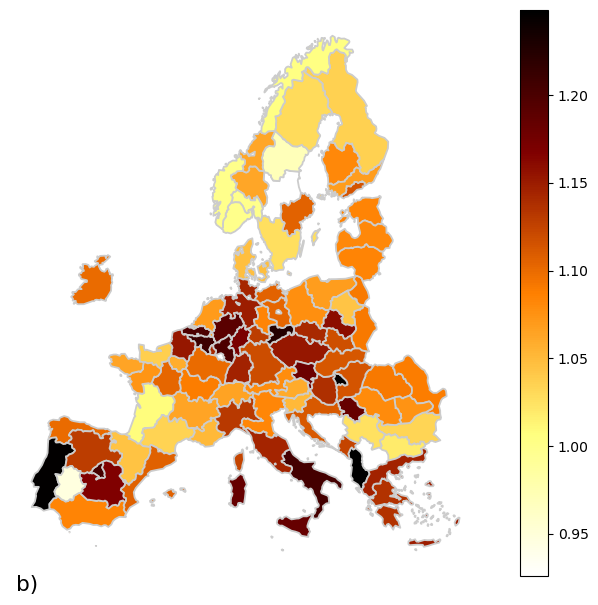

In [121]:
# plot mortality per NUTS 1 region
map_plot(avg_mortality1, 'death_p_100k_vs_avg', 'afmhot_r', 
         '')